In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:,.2f}'.format

# Load the data
def load_data(file_path: str) -> pd.DataFrame:
    """Load dataset from a given file path."""
    return pd.read_csv(file_path)

# Load the dataset
df = load_data('../data/raw/Customer_Data.csv')

# We convert name of feature to lower font
df.columns = map(str.lower, df.columns)

# Display the first few rows
df.head()

cust_id  balance  balance_frequency  purchases  oneoff_purchases  \
0  C10001    40.90               0.82      95.40              0.00   
1  C10002 3,202.47               0.91       0.00              0.00   
2  C10003 2,495.15               1.00     773.17            773.17   
3  C10004 1,666.67               0.64   1,499.00          1,499.00   
4  C10005   817.71               1.00      16.00             16.00   

   installments_purchases  cash_advance  purchases_frequency  \
0                   95.40          0.00                 0.17   
1                    0.00      6,442.95                 0.00   
2                    0.00          0.00                 1.00   
3                    0.00        205.79                 0.08   
4                    0.00          0.00                 0.08   

   oneoff_purchases_frequency  purchases_installments_frequency  \
0                        0.00                              0.08   
1                        0.00                              0.00   
2                        1.00                              0.00   
3                        0.08                              0.00   
4                        0.08                              0.00   

   cash_advance_frequency  cash_advance_trx  purchases_trx  credit_limit  \
0                    0.00                 0              2      1,000.00   
1                    0.25                 4              0      7,000.00   
2                    0.00                 0             12      7,500.00   
3                    0.08                 1              1      7,500.00   
4                    0.00                 0              1      1,200.00   

   payments  minimum_payments  prc_full_payment  tenure  
0    201.80            139.51              0.00      12  
1  4,103.03          1,072.34              0.22      12  
2    622.07            627.28              0.00      12  
3      0.00               NaN              0.00      12  
4    678.33            244.79              0.00      12

In [3]:
df.drop('cust_id', axis=1, inplace=True)



In [4]:
df.shape

(8950, 17)

In [5]:
df.describe()

balance  balance_frequency  purchases  oneoff_purchases  \
count  8,950.00           8,950.00   8,950.00          8,950.00   
mean   1,564.47               0.88   1,003.20            592.44   
std    2,081.53               0.24   2,136.63          1,659.89   
min        0.00               0.00       0.00              0.00   
25%      128.28               0.89      39.63              0.00   
50%      873.39               1.00     361.28             38.00   
75%    2,054.14               1.00   1,110.13            577.40   
max   19,043.14               1.00  49,039.57         40,761.25   

       installments_purchases  cash_advance  purchases_frequency  \
count                8,950.00      8,950.00             8,950.00   
mean                   411.07        978.87                 0.49   
std                    904.34      2,097.16                 0.40   
min                      0.00          0.00                 0.00   
25%                      0.00          0.00                 0.08   
50%                     89.00          0.00                 0.50   
75%                    468.64      1,113.82                 0.92   
max                 22,500.00     47,137.21                 1.00   

       oneoff_purchases_frequency  purchases_installments_frequency  \
count                    8,950.00                          8,950.00   
mean                         0.20                              0.36   
std                          0.30                              0.40   
min                          0.00                              0.00   
25%                          0.00                              0.00   
50%                          0.08                              0.17   
75%                          0.30                              0.75   
max                          1.00                              1.00   

       cash_advance_frequency  cash_advance_trx  purchases_trx  credit_limit  \
count                8,950.00          8,950.00       8,950.00      8,949.00   
mean                     0.14              3.25          14.71      4,494.45   
std                      0.20              6.82          24.86      3,638.82   
min                      0.00              0.00           0.00         50.00   
25%                      0.00              0.00           1.00      1,600.00   
50%                      0.00              0.00           7.00      3,000.00   
75%                      0.22              4.00          17.00      6,500.00   
max                      1.50            123.00         358.00     30,000.00   

       payments  minimum_payments  prc_full_payment   tenure  
count  8,950.00          8,637.00          8,950.00 8,950.00  
mean   1,733.14            864.21              0.15    11.52  
std    2,895.06          2,372.45              0.29     1.34  
min        0.00              0.02              0.00     6.00  
25%      383.28            169.12              0.00    12.00  
50%      856.90            312.34              0.00    12.00  
75%    1,901.13            825.49              0.14    12.00  
max   50,721.48         76,406.21              1.00    12.00

In [6]:
df.duplicated().sum()

np.int64(0)

In [7]:
df.sample(5).T

6173     2999   1069     7105      1434
balance                            932.15    36.61 601.37 2,666.15  2,920.39
balance_frequency                    1.00     0.55   1.00     1.00      1.00
purchases                          572.64   224.40  35.80     0.00  2,673.73
oneoff_purchases                     0.00   224.40  35.80     0.00  1,221.60
installments_purchases             572.64     0.00   0.00     0.00  1,452.13
cash_advance                         0.00     0.00   0.00 2,704.30  5,573.51
purchases_frequency                  1.00     0.17   0.08     0.00      1.00
oneoff_purchases_frequency           0.00     0.17   0.08     0.00      0.33
purchases_installments_frequency     1.00     0.00   0.00     0.00      1.00
cash_advance_frequency               0.00     0.00   0.00     0.17      0.50
cash_advance_trx                     0.00     0.00   0.00     2.00     13.00
purchases_trx                       24.00     2.00   1.00     0.00     59.00
credit_limit                     1,000.00 2,100.00 750.00 3,000.00 15,000.00
payments                         1,794.69   372.09 255.50   592.96  3,319.33
minimum_payments                 3,605.68   151.08 217.07   807.75    649.15
prc_full_payment                     0.08     0.00   0.00     0.00      0.00
tenure                              12.00    12.00  12.00    12.00     12.00

In [8]:
# Check missing values in the DataFrame
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])


credit_limit          1
minimum_payments    313
dtype: int64


In [9]:
df.minimum_payments.sample(10)

8369      178.84
5952    1,600.27
8899       16.26
1428      581.50
677       207.13
5759      458.50
2478      564.47
4804      118.31
1027   17,693.08
8213       99.95
Name: minimum_payments, dtype: float64

In [10]:
df.credit_limit.sample(10)

551    9,000.00
3651   2,100.00
6717   2,500.00
8920   2,000.00
7575   2,000.00
1816   1,700.00
3991   6,000.00
2681   7,000.00
5434   3,500.00
5935   6,500.00
Name: credit_limit, dtype: float64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   balance                           8950 non-null   float64
 1   balance_frequency                 8950 non-null   float64
 2   purchases                         8950 non-null   float64
 3   oneoff_purchases                  8950 non-null   float64
 4   installments_purchases            8950 non-null   float64
 5   cash_advance                      8950 non-null   float64
 6   purchases_frequency               8950 non-null   float64
 7   oneoff_purchases_frequency        8950 non-null   float64
 8   purchases_installments_frequency  8950 non-null   float64
 9   cash_advance_frequency            8950 non-null   float64
 10  cash_advance_trx                  8950 non-null   int64  
 11  purchases_trx                     8950 non-null   int64  
 12  credit

In [12]:
from sklearn.impute import SimpleImputer

# Columns that need imputation
columns_to_impute = ['minimum_payments', 'credit_limit']

# Create a SimpleImputer object with the desired strategy (median or mean)
imputer = SimpleImputer(strategy='median')

# Apply imputation to those specific columns
df[columns_to_impute] = imputer.fit_transform(df[columns_to_impute])

In [13]:
# Verify no missing values remain in those specific columns
print(df[columns_to_impute].isnull().sum())


minimum_payments    0
credit_limit        0
dtype: int64


In [14]:
df.isnull().sum()

balance                             0
balance_frequency                   0
purchases                           0
oneoff_purchases                    0
installments_purchases              0
cash_advance                        0
purchases_frequency                 0
oneoff_purchases_frequency          0
purchases_installments_frequency    0
cash_advance_frequency              0
cash_advance_trx                    0
purchases_trx                       0
credit_limit                        0
payments                            0
minimum_payments                    0
prc_full_payment                    0
tenure                              0
dtype: int64

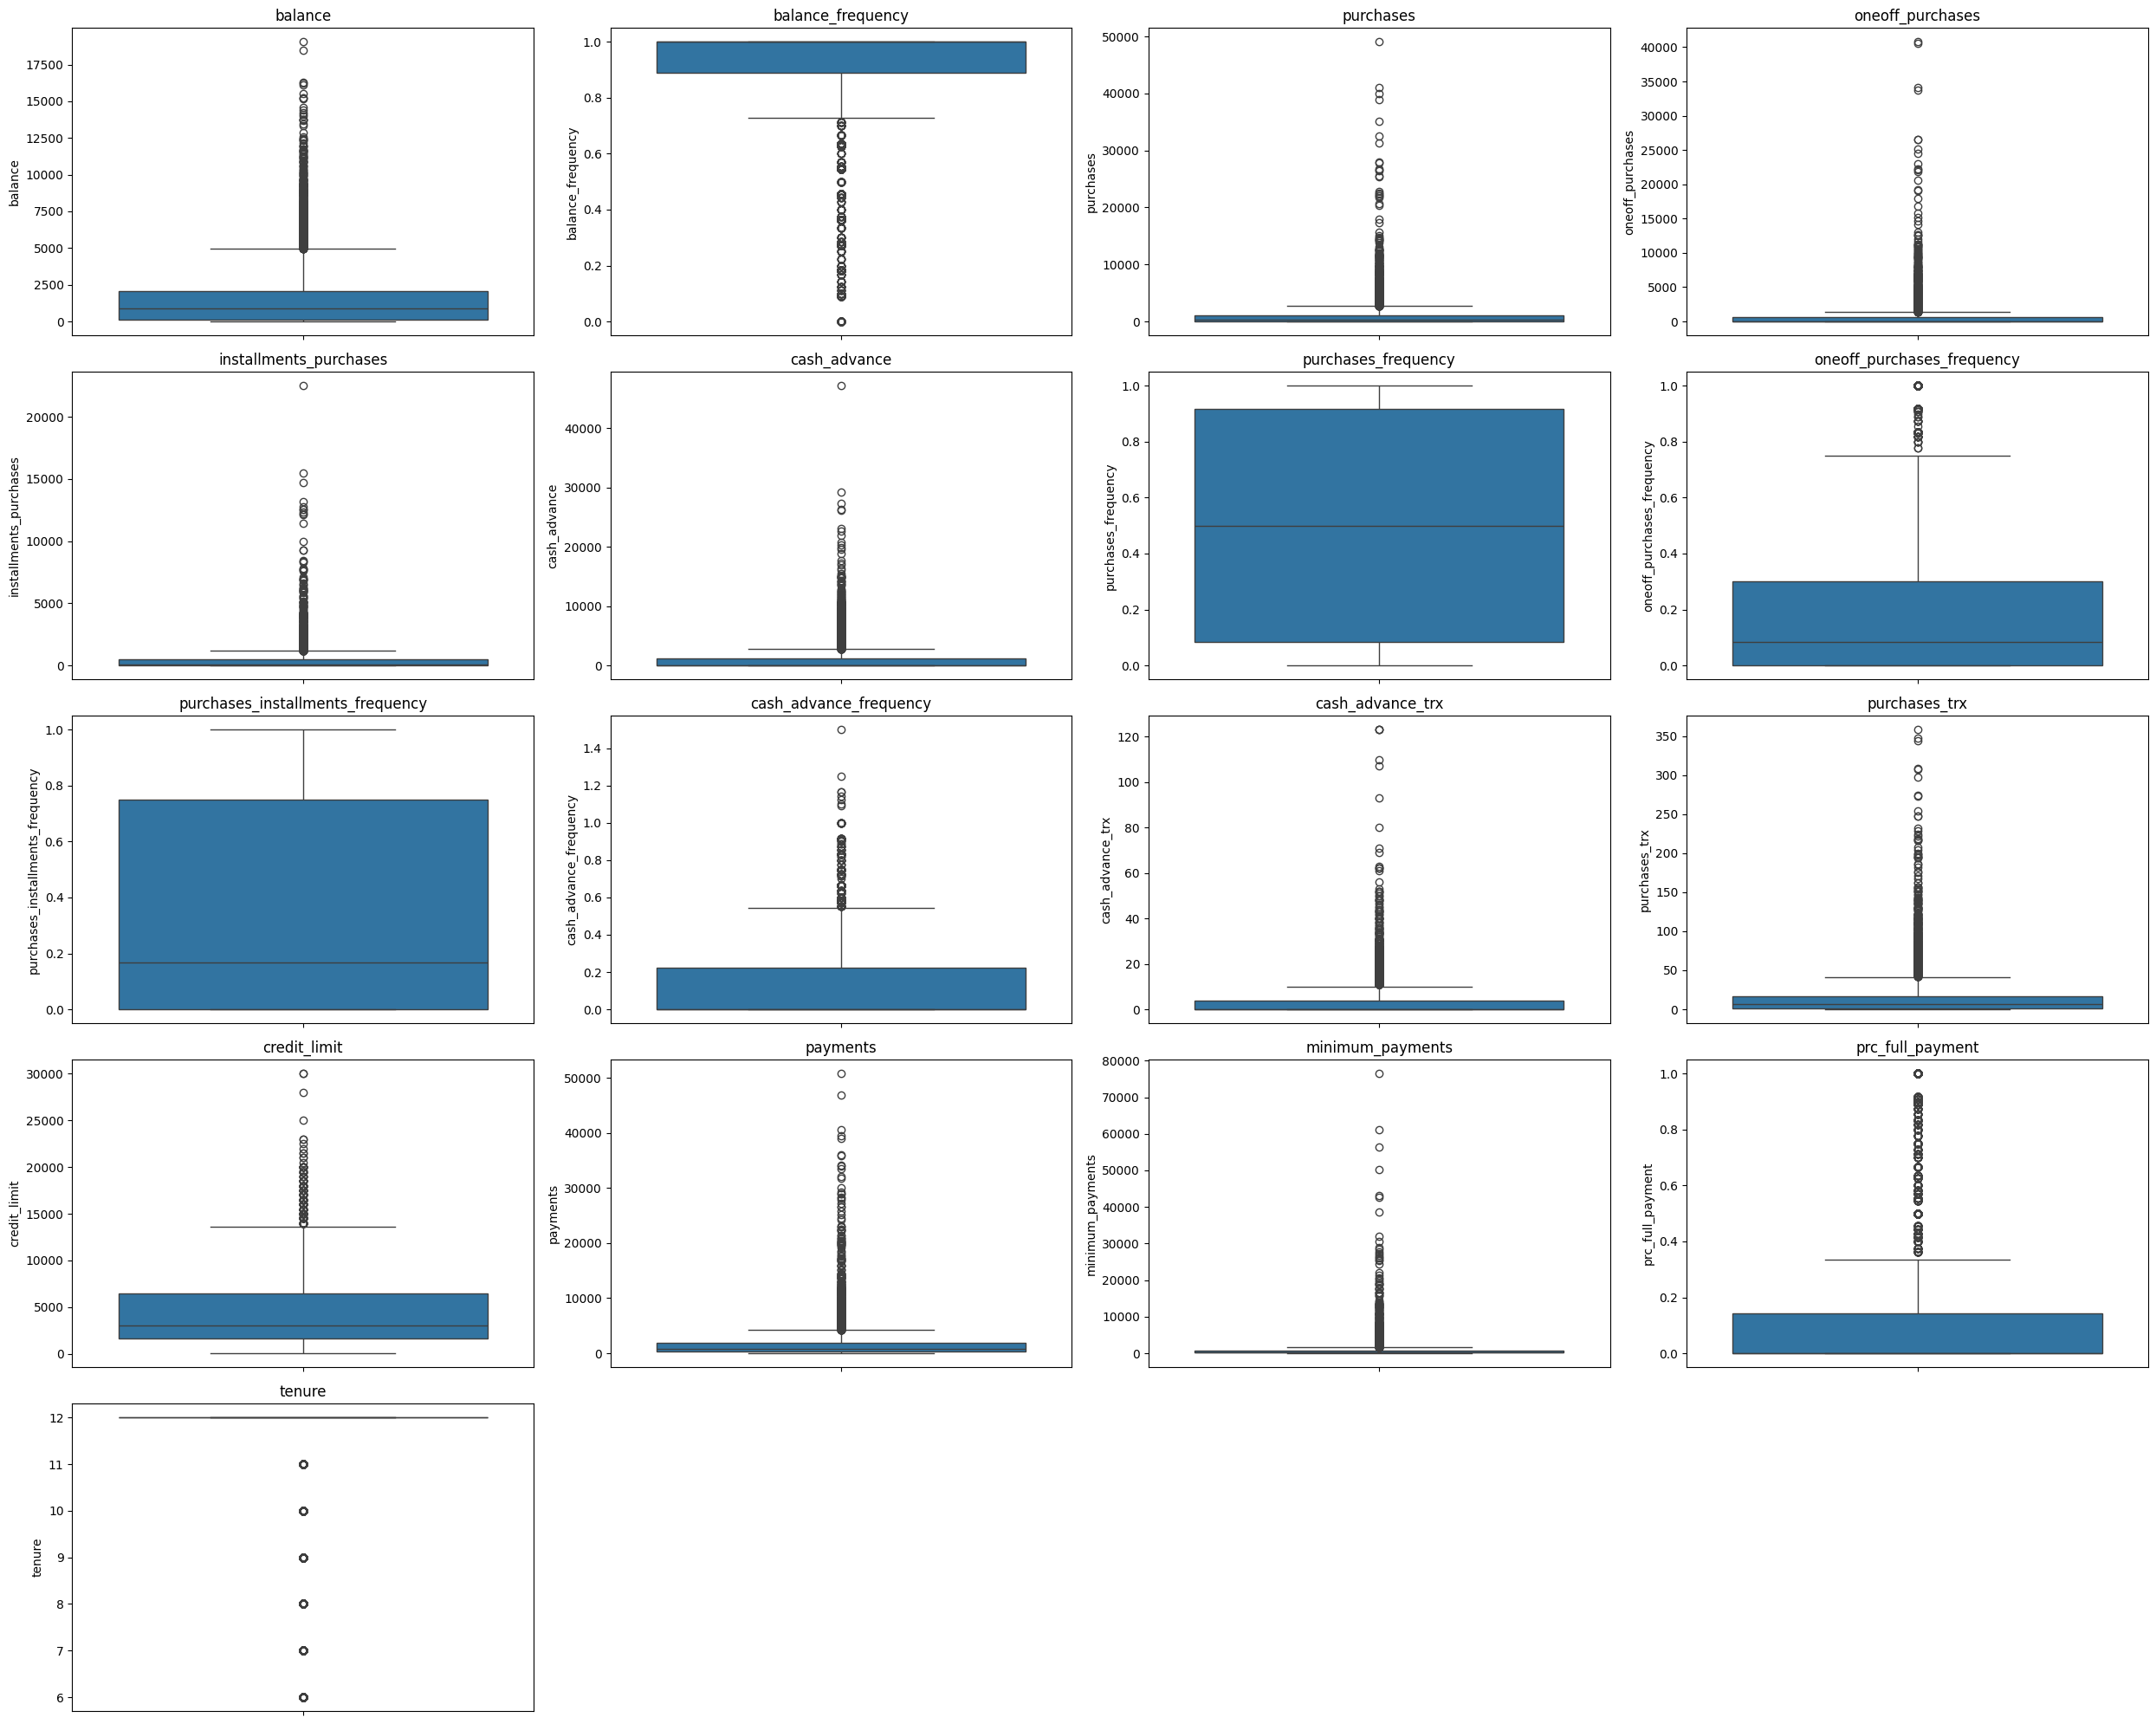

In [15]:
# plot for outliers detection

plt.figure(figsize=(25,20))
for i in range(len(df.columns)):
    plt.subplot(5,4,i+1)
    sns.boxplot(df[df.columns[i]])
    plt.title(df.columns[i])
    
plt.tight_layout()

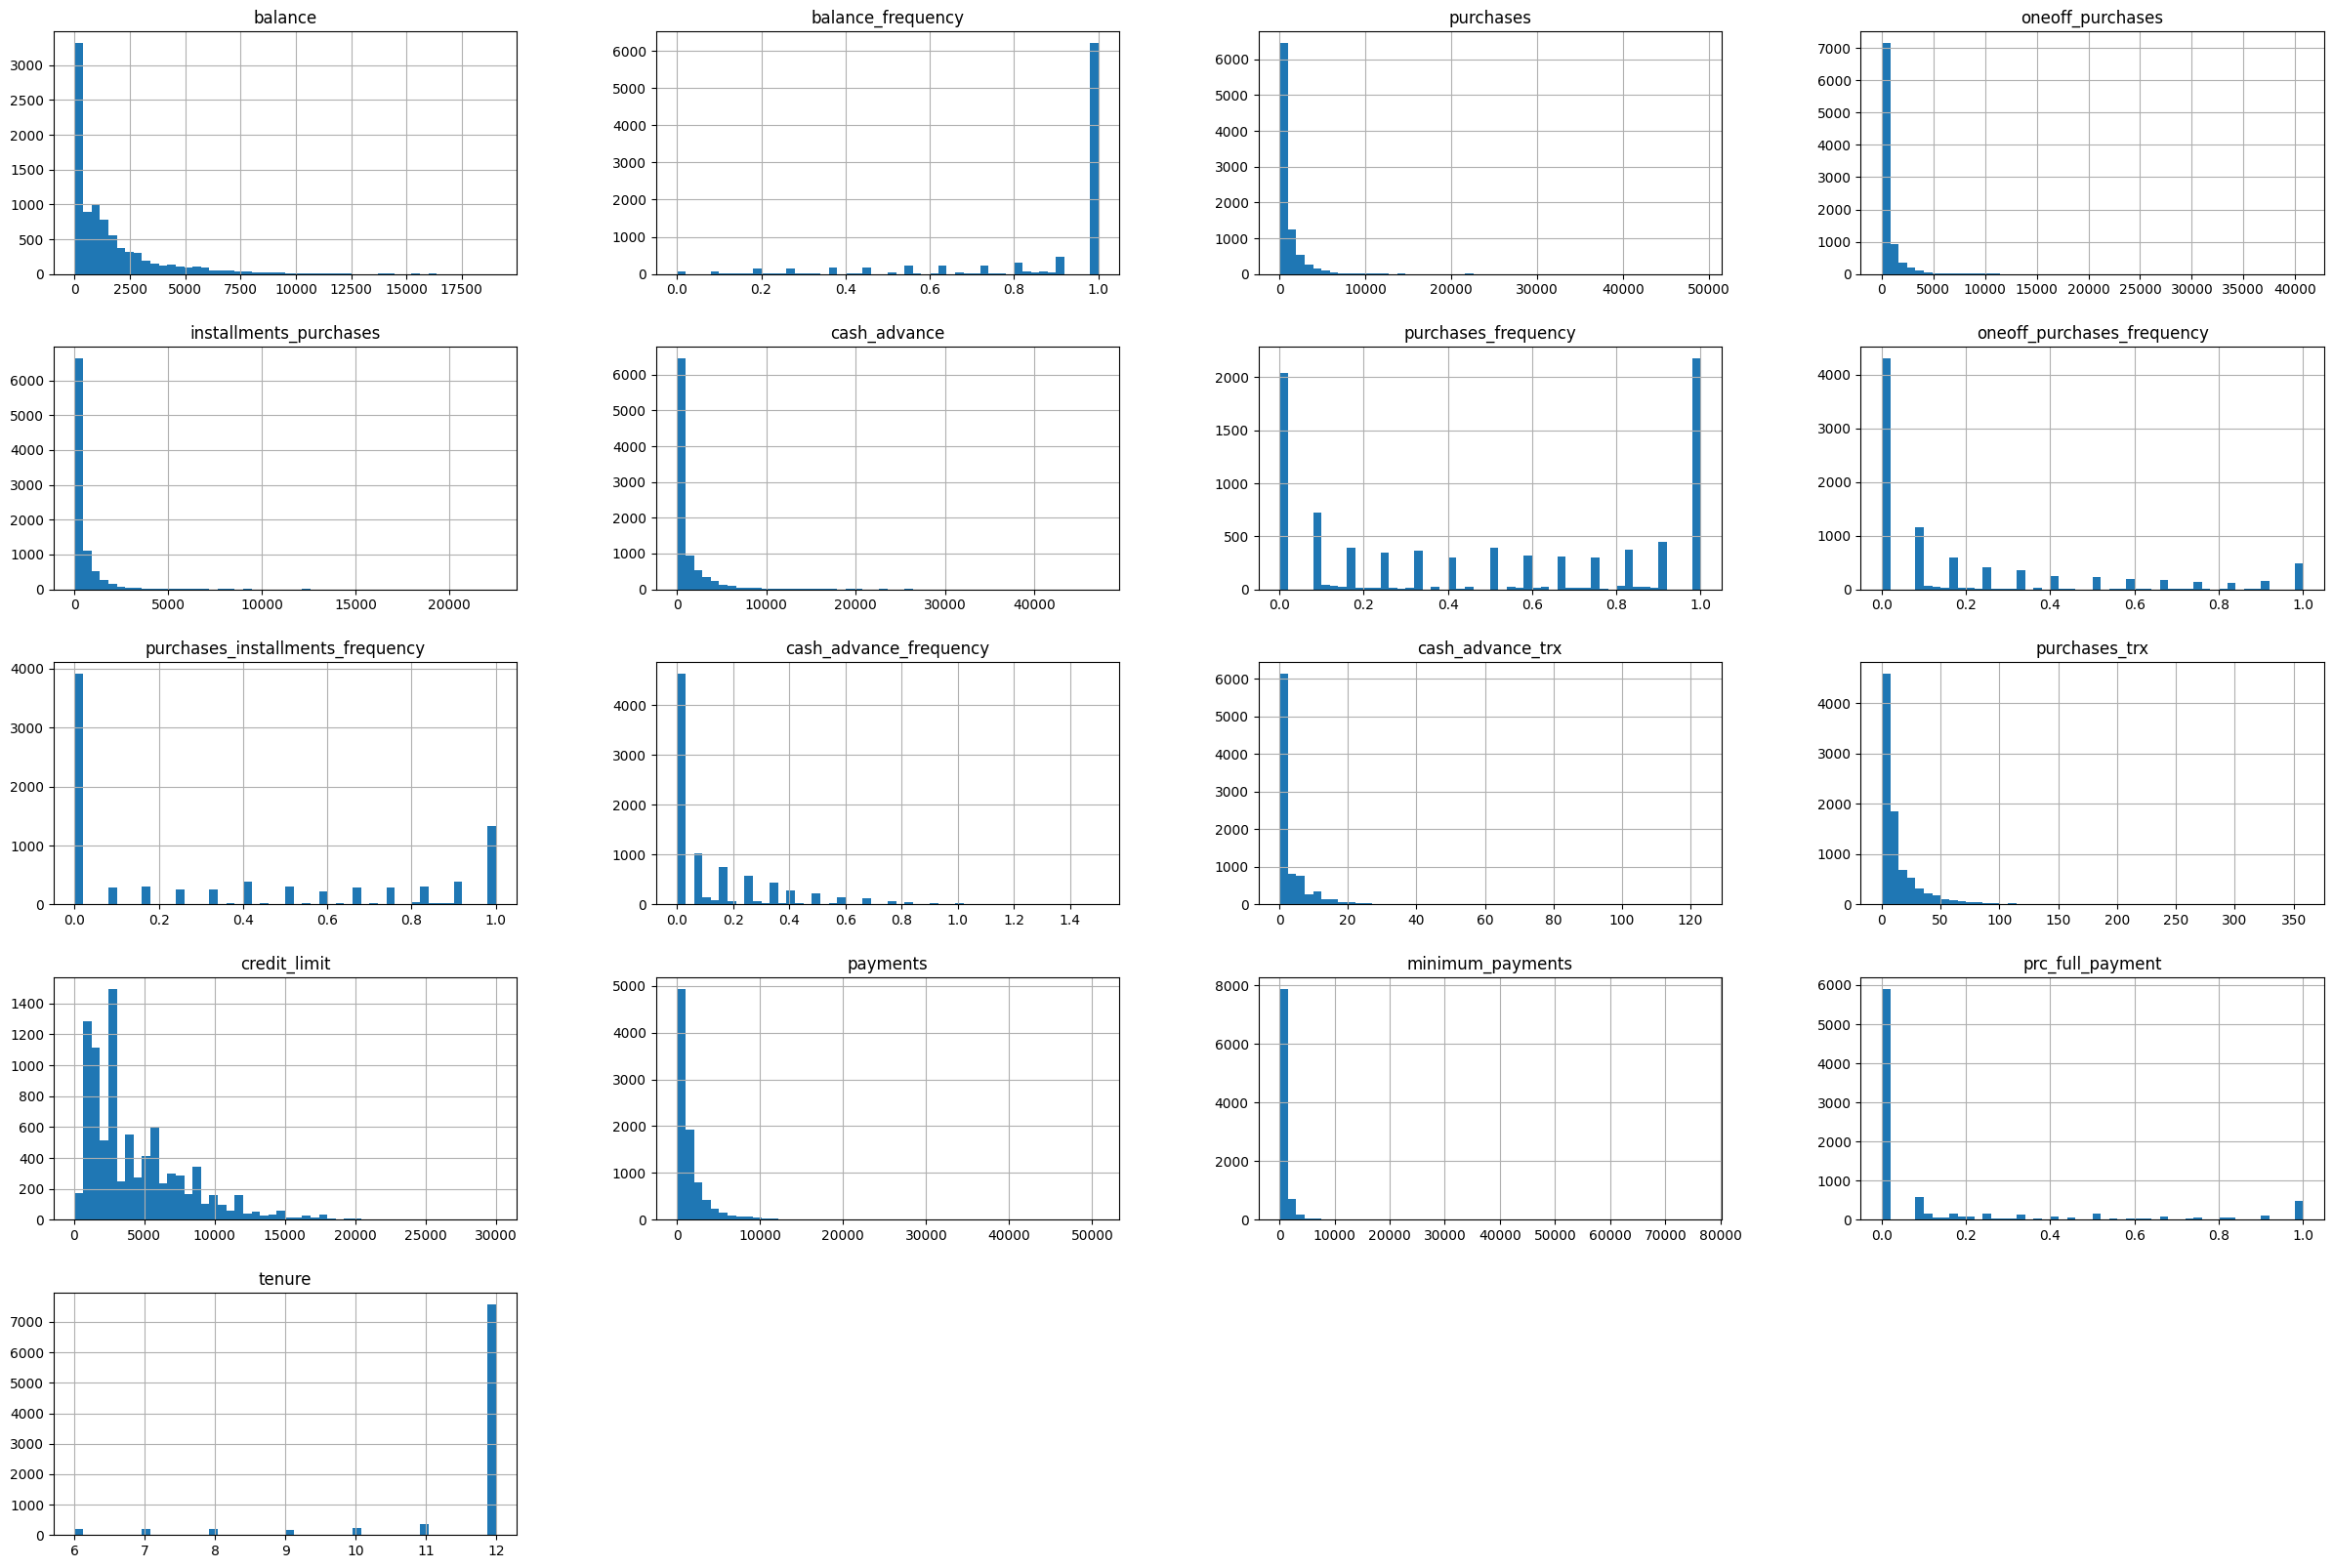

In [16]:
# Distribution plot to visualize data distribution

hist_plot = df.hist(bins=50,figsize=(30,20))

plt.show()

In [17]:
import pandas as pd

def detect_outliers_iqr(df, sample_limit=3):
    """Detects outliers in a DataFrame using the Interquartile Range (IQR) method.

    Args:
        df (pd.DataFrame): The input DataFrame.
        sample_limit (int, optional): The maximum number of outliers to sample for each column. Defaults to 3.

    Returns:
        pd.DataFrame: A summary DataFrame containing information about detected outliers for each numerical column.
    """
    outliers_summary = []

    for column in df.select_dtypes(include=['float64', 'int64']).columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1

        # Define lower and upper bounds
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Identify outliers
        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        total_count = len(df)
        outlier_count = len(outliers)
        outlier_percentage = (outlier_count / total_count) * 100

        # Calculate additional statistics
        mean = df[column].mean()
        median = df[column].median()
        std_dev = df[column].std()
        skewness = df[column].skew()
        kurtosis = df[column].kurtosis()

        # Collect summary information
        outliers_summary.append({
            "Column": column,
            "Total Observations": total_count,
            "Number of Outliers": outlier_count,
            "Outlier Percentage (%)": round(outlier_percentage, 2),
            "Mean": round(mean, 2),
            "Median": round(median, 2),
            "Standard Deviation": round(std_dev, 2),
            "Skewness": round(skewness, 2),
            "Kurtosis": round(kurtosis, 2),
            "Sample Outliers": outliers.head(sample_limit).to_dict(orient='records') if outlier_count > 0 else "None"
        })

    # Create a DataFrame for summary
    summary_df = pd.DataFrame(outliers_summary)

    # Sort by Outlier Percentage in descending order
    summary_df.sort_values(by="Outlier Percentage (%)", ascending=False, inplace=True)

    return summary_df

# Example: Detect outliers in all numerical columns with limited sample size # Replace with your actual DataFrame
outliers_summary_df = detect_outliers_iqr(df, sample_limit=3)

# Display the summary DataFrame with improved formatting
print("Outlier Summary:")
print("-" * 220)
print("{:<35} {:<25} {:<25} {:<25} {:<20} {:<20} {:<25} {:<20} {:<20} {}".format(
    "Column", "Total Observations", "Number of Outliers", "Outlier Percentage (%)", "Mean", "Median", 
    "Standard Deviation", "Skewness", "Kurtosis", "Sample Outliers"
))
print("-" * 220)

for index, row in outliers_summary_df.iterrows():
    sample_outliers_str = str(row["Sample Outliers"])[:50] + "..." if len(str(row["Sample Outliers"])) > 50 else str(row["Sample Outliers"])
    print("{:<35} {:<25} {:<25} {:<25} {:<20} {:<20} {:<25} {:<20} {:<20} {}".format(
        row["Column"],
        row["Total Observations"],
        row["Number of Outliers"],
        row["Outlier Percentage (%)"],
        row["Mean"],
        row["Median"],
        row["Standard Deviation"],
        row["Skewness"],
        row["Kurtosis"],
        sample_outliers_str
    ))
print("-" * 220)


Outlier Summary:
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Column                              Total Observations        Number of Outliers        Outlier Percentage (%)    Mean                 Median               Standard Deviation        Skewness             Kurtosis             Sample Outliers
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
balance_frequency                   8950                      1493                      16.68                     0.88                 1.0                  0.24                      -2.02                3.09                 [{'balance': 1666.670542, 'balance_frequency': 0.6...
prc_full_payment       

In [18]:
# Function to treat outliers (capping method) and calculate the percentage after treatment
def treat_outliers(df, outliers_summary_df, method='cap'):
    """Treat outliers in a DataFrame by either capping or removing them."""
    treatment_summary = []
    df_cleaned = df.copy()

    for index, row in outliers_summary_df.iterrows():
        column = row['Column']
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Store the original number of outliers before treatment
        original_outlier_count = row['Number of Outliers']

        if method == 'cap':
            # Cap the outliers
            df_cleaned[column] = df_cleaned[column].clip(lower_bound, upper_bound)
        elif method == 'remove':
            # Remove rows containing outliers
            outliers = df_cleaned[(df_cleaned[column] < lower_bound) | (df_cleaned[column] > upper_bound)]
            df_cleaned = df_cleaned.drop(outliers.index)

        # Calculate the number of outliers after treatment
        outliers_after = df_cleaned[(df_cleaned[column] < lower_bound) | (df_cleaned[column] > upper_bound)]
        outliers_after_count = len(outliers_after)
        outlier_percentage_after = (outliers_after_count / len(df_cleaned)) * 100

        # Add to treatment summary
        treatment_summary.append({
            "Column": column,
            "Treatment": method.capitalize(),
            "Original Outlier Percentage (%)": row["Outlier Percentage (%)"],
            "Outlier Percentage After Treatment (%)": round(outlier_percentage_after, 2),
            "Number of Treated Outliers": original_outlier_count - outliers_after_count
        })

    return df_cleaned, treatment_summary


# Example usage:

# Step 1: Detect outliers
outliers_summary_df = detect_outliers_iqr(df, sample_limit=3)

# Step 2: Treat outliers (capping in this case)
df_cleaned, treatment_summary = treat_outliers(df, outliers_summary_df, method='cap')

# Step 3: Display cleaned DataFrame
print("\nCleaned DataFrame (First 5 Rows):")
print(df_cleaned.head().to_string())

# Step 4: Create and display treatment summary DataFrame
treatment_summary_df = pd.DataFrame(treatment_summary)

print("\nOutlier Treatment Summary:")
print("-" * 140)
print("{:<35} {:<15} {:<25} {:<25} {:<25}".format(
    "Column", "Treatment", "Original Outlier (%)", "Outlier After Treatment (%)", "Number of Treated Outliers"
))
print("-" * 140)

for index, row in treatment_summary_df.iterrows():
    print("{:<35} {:<15} {:<25} {:<25} {:<25}".format(
        row["Column"],
        row["Treatment"],
        row["Original Outlier Percentage (%)"],
        row["Outlier Percentage After Treatment (%)"],
        row["Number of Treated Outliers"]
    ))
print("-" * 140)

# Step 5: Compare summary statistics before and after treatment
print("\nSummary Statistics (Before Treatment):")
print(df.describe())

print("\nSummary Statistics (After Treatment):")
print(df_cleaned.describe())


Cleaned DataFrame (First 5 Rows):
   balance  balance_frequency  purchases  oneoff_purchases  installments_purchases  cash_advance  purchases_frequency  oneoff_purchases_frequency  purchases_installments_frequency  cash_advance_frequency  cash_advance_trx  purchases_trx  credit_limit  payments  minimum_payments  prc_full_payment  tenure
0    40.90               0.82      95.40              0.00                   95.40          0.00                 0.17                        0.00                              0.08                    0.00                 0              2      1,000.00    201.80            139.51              0.00      12
1 3,202.47               0.91       0.00              0.00                    0.00      2,784.55                 0.00                        0.00                              0.00                    0.25                 4              0      7,000.00  4,103.03          1,072.34              0.22      12
2 2,495.15               1.00     773.17          

In [19]:
import pandas as pd
import numpy as np

# Function to detect skewness, kurtosis, and summarize statistics
def detect_skewness_kurtosis(df):
    skewness_kurtosis_summary = []
    
    # Iterate through numeric columns to calculate skewness and kurtosis
    for column in df.select_dtypes(include=['float64', 'int64']).columns:
        skewness = df[column].skew()
        kurtosis = df[column].kurtosis()
        mean = df[column].mean()
        median = df[column].median()
        std_dev = df[column].std()

        skewness_kurtosis_summary.append({
            "Column": column,
            "Skewness": round(skewness, 2),
            "Kurtosis": round(kurtosis, 2),
            "Mean": round(mean, 2),
            "Median": round(median, 2),
            "Standard Deviation": round(std_dev, 2),
        })

    summary_df = pd.DataFrame(skewness_kurtosis_summary)
    
    # Adding interpretation of skewness and kurtosis
    summary_df["Skewness Interpretation"] = summary_df["Skewness"].apply(lambda x: "Highly Positive Skew" if x > 1 
                                                                         else ("Moderately Positive Skew" if x > 0.5 
                                                                               else ("Symmetrical" if -0.5 <= x <= 0.5 
                                                                                     else ("Moderately Negative Skew" if x > -1 
                                                                                           else "Highly Negative Skew"))))
    
    summary_df["Kurtosis Interpretation"] = summary_df["Kurtosis"].apply(lambda x: "Leptokurtic (Heavy Tails)" if x > 3
                                                                         else ("Mesokurtic (Normal)" if 2.5 <= x <= 3
                                                                               else ("Platykurtic (Light Tails)" if x < 2.5 else "Undetermined")))

    return summary_df

# Function to fix skewness and potentially kurtosis
def fix_skewness_kurtosis(df, summary_df, skew_threshold=0.5, kurt_threshold=3):
    for index, row in summary_df.iterrows():
        column = row['Column']
        skewness = row['Skewness']
        kurtosis = row['Kurtosis']

        # Apply transformations based on skewness
        if skewness > skew_threshold:  # Positive skewness
            df[column] = np.log1p(df[column].clip(0))  # Log transformation
        elif skewness < -skew_threshold:  # Negative skewness
            df[column] = np.sqrt(df[column].clip(0))  # Square root transformation

        # Optionally, apply transformations for high kurtosis
        if kurtosis > kurt_threshold:  # Leptokurtic, potential outliers
            df[column] = np.log1p(df[column].clip(0))  # Log transform to reduce the effect of outliers
        elif kurtosis < 2.5:  # Platykurtic, may need spreading
            df[column] = np.power(df[column], 2)  # Power transformation to increase variance
            
    return df

#


In [20]:
# Example DataFrame creation (replace with your actual DataFrame)
# df = pd.DataFrame({...})  # Your DataFrame here

# Step 1: Detect skewness and kurtosis in the DataFrame
skewness_summary_df = detect_skewness_kurtosis(df_cleaned)

# Step 2: Display before skewness fixing summary
print("\n" + "="*60)
print("Skewness and Kurtosis Summary Before Fixing")
print("="*60)
print(skewness_summary_df.to_string(index=False))

# Step 3: Fix skewness in the DataFrame
df_fixed_skewness = fix_skewness_kurtosis(df_cleaned.copy(), skewness_summary_df)

# Step 4: Detect skewness and kurtosis again after fixing
skewness_summary_fixed_df = detect_skewness_kurtosis(df_fixed_skewness)

# Step 5: Display after skewness fixing summary
print("\n" + "="*60)
print("Skewness and Kurtosis Summary After Fixing")
print("="*60)
print(skewness_summary_fixed_df.to_string(index=False))

# Optionally, display the differences
comparison_df = pd.merge(skewness_summary_df, skewness_summary_fixed_df, on="Column", suffixes=('_Before', '_After'))
comparison_df = comparison_df[["Column", "Skewness_Before", "Skewness_After", 
                                 "Kurtosis_Before", "Kurtosis_After", 
                                 "Skewness Interpretation_Before", "Skewness Interpretation_After", 
                                 "Kurtosis Interpretation_Before", "Kurtosis Interpretation_After"]]

print("\n" + "="*60)
print("Comparison of Skewness and Kurtosis Before and After Fixing")
print("="*60)
print(comparison_df.to_string(index=False))


Skewness and Kurtosis Summary Before Fixing
                          Column  Skewness  Kurtosis     Mean   Median  Standard Deviation  Skewness Interpretation   Kurtosis Interpretation
                         balance      1.17      0.20 1,390.51   873.39            1,537.54     Highly Positive Skew Platykurtic (Light Tails)
               balance_frequency     -1.17     -0.43     0.93     1.00                0.11     Highly Negative Skew Platykurtic (Light Tails)
                       purchases      1.21      0.15   737.15   361.28              879.53     Highly Positive Skew Platykurtic (Light Tails)
                oneoff_purchases      1.24     -0.03   354.36    38.00              511.82     Highly Positive Skew Platykurtic (Light Tails)
          installments_purchases      1.22      0.09   295.55    89.00              396.18     Highly Positive Skew Platykurtic (Light Tails)
                    cash_advance      1.24     -0.04   672.47     0.00              998.51     Highly P

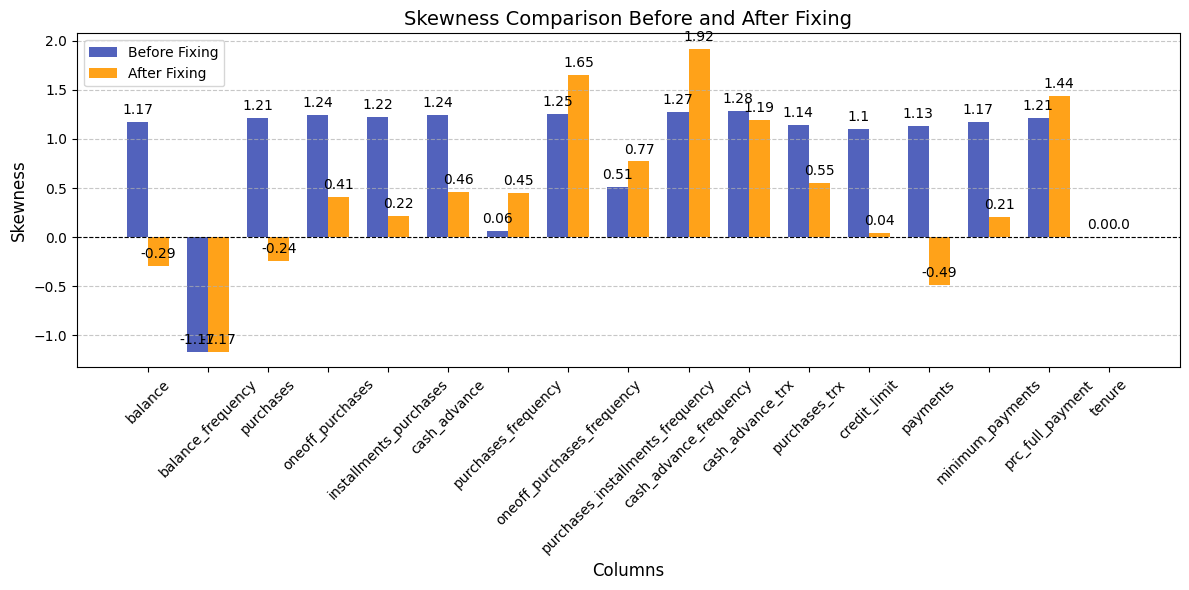

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def plot_skewness_comparison(original_summary, fixed_summary):
    plt.figure(figsize=(12, 6))

    # Set up the bar plot
    bar_width = 0.35
    index = np.arange(len(original_summary))

    # Create bars for original skewness with modern colors
    bars1 = plt.bar(index, original_summary['Skewness'], bar_width, label='Before Fixing', alpha=0.9, color='#3F51B5')  # Indigo

    # Create bars for fixed skewness with modern colors
    bars2 = plt.bar(index + bar_width, fixed_summary['Skewness'], bar_width, label='After Fixing', alpha=0.9, color='#FF9800')  # Orange

    # Adding labels and title
    plt.xlabel('Columns', fontsize=12)
    plt.ylabel('Skewness', fontsize=12)
    plt.title('Skewness Comparison Before and After Fixing', fontsize=14)
    plt.xticks(index + bar_width / 2, original_summary['Column'], rotation=45)

    # Adding data labels on top of the bars
    for bar in bars1:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval + 0.05, round(yval, 2), ha='center', va='bottom', fontsize=10)

    for bar in bars2:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval + 0.05, round(yval, 2), ha='center', va='bottom', fontsize=10)

    # Adding grid lines for better readability
    plt.axhline(0, color='black', linewidth=0.8, ls='--')
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Adding legend
    plt.legend()

    plt.tight_layout()
    plt.show()

# Step 7: Plot skewness comparison
plot_skewness_comparison(skewness_summary_df, skewness_summary_fixed_df)


In [22]:
skewness_summary_fixed_df.head()

Column  Skewness  Kurtosis  Mean  Median  \
0                 balance     -0.29     -1.05 41.56   45.88   
1       balance_frequency     -1.17     -0.43  0.93    1.00   
2               purchases     -0.24     -1.21 31.65   34.72   
3        oneoff_purchases      0.41     -1.50 19.60   13.42   
4  installments_purchases      0.22     -1.57 19.94   20.25   

   Standard Deviation Skewness Interpretation    Kurtosis Interpretation  
0               21.11             Symmetrical  Platykurtic (Light Tails)  
1                0.11    Highly Negative Skew  Platykurtic (Light Tails)  
2               21.52             Symmetrical  Platykurtic (Light Tails)  
3               21.15             Symmetrical  Platykurtic (Light Tails)  
4               19.51             Symmetrical  Platykurtic (Light Tails)

In [23]:
df_fixed_skewness.head()

balance  balance_frequency  purchases  oneoff_purchases  \
0    13.95               0.82      20.87              0.00   
1    65.16               0.91       0.00              0.00   
2    61.19               1.00      44.25             44.25   
3    55.04               0.72      53.48             52.93   
4    44.99               1.00       8.03              8.03   

   installments_purchases  cash_advance  purchases_frequency  \
0                   20.87          0.00                 0.03   
1                    0.00         62.92                 0.00   
2                    0.00          0.00                 1.00   
3                    0.00         28.43                 0.01   
4                    0.00          0.00                 0.01   

   oneoff_purchases_frequency  purchases_installments_frequency  \
0                        0.00                              0.01   
1                        0.00                              0.00   
2                        0.31                              0.00   
3                        0.01                              0.00   
4                        0.01                              0.00   

   cash_advance_frequency  cash_advance_trx  purchases_trx  credit_limit  \
0                    0.00              0.00           1.21         47.73   
1                    0.05              2.59           0.00         78.39   
2                    0.00              0.00           6.58         79.62   
3                    0.01              0.48           0.48         79.62   
4                    0.00              0.00           0.48         50.28   

   payments  minimum_payments  prc_full_payment  tenure  
0     28.22             24.46              0.00     144  
1     69.22             48.70              0.04     144  
2     41.40             41.51              0.00     144  
3      0.00             33.03              0.00     144  
4     42.52             30.30              0.00     144

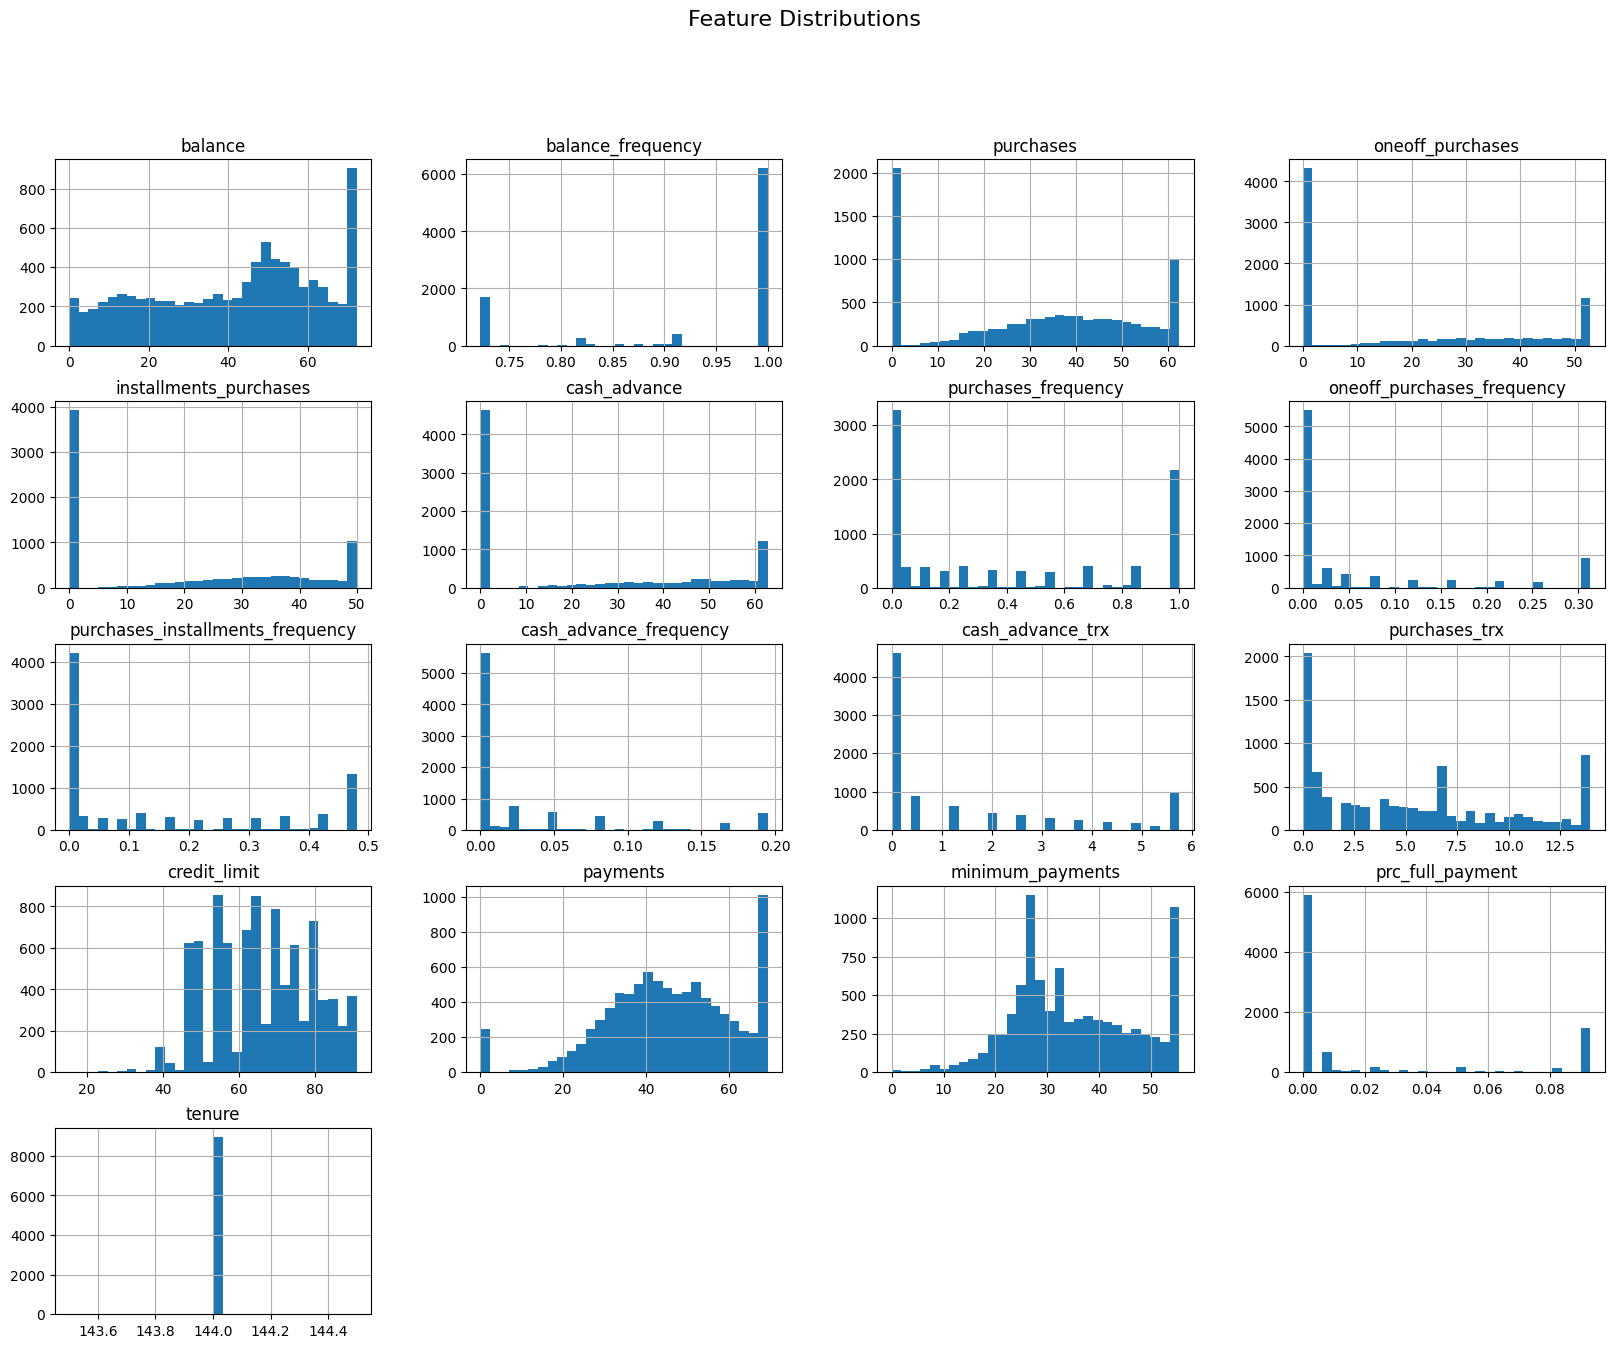

In [24]:
# Feature Distributions
df_fixed_skewness.hist(bins=30, figsize=(20, 15))
plt.suptitle('Feature Distributions', fontsize=16)
plt.show()

In [25]:
# creating new variable for modeling
df_model = df_fixed_skewness.copy()

In [26]:
import pandas as pd
import numpy as np

def summary_stats(df_model, n=4):
    """
    Generate detailed descriptive statistics for the given DataFrame.

    Parameters:
    df_model (pd.DataFrame): The DataFrame for which to calculate statistics.
    n (int): Number of decimal places to round to.

    Returns:
    pd.DataFrame: A DataFrame containing descriptive statistics for each attribute.
    """
    
    # Calculate central tendency
    mean = pd.DataFrame(df_model.apply(np.mean)).T
    median = pd.DataFrame(df_model.apply(np.median)).T
    
    # Calculate distribution statistics
    std = pd.DataFrame(df_model.apply(np.std)).T
    min_value = pd.DataFrame(df_model.apply(np.min)).T
    max_value = pd.DataFrame(df_model.apply(np.max)).T
    range_value = pd.DataFrame(df_model.apply(lambda x: x.max() - x.min())).T
    skewness = pd.DataFrame(df_model.apply(lambda x: x.skew())).T
    kurtosis = pd.DataFrame(df_model.apply(lambda x: x.kurtosis())).T
    count = pd.DataFrame(df_model.count()).T  # Count of non-null values
    
    # Concatenate all statistics into a single DataFrame
    summary_stats = pd.concat([count, min_value, max_value, range_value, mean, median, std, skewness, kurtosis]).T.reset_index()
    summary_stats.columns = ['Attributes', 'Count', 'Min', 'Max', 'Range', 'Mean', 'Median', 'Std Dev', 'Skewness', 'Kurtosis']
    
    # Format the DataFrame for better readability
    summary_stats['Min'] = summary_stats['Min'].round(n)
    summary_stats['Max'] = summary_stats['Max'].round(n)
    summary_stats['Range'] = summary_stats['Range'].round(n)
    summary_stats['Mean'] = summary_stats['Mean'].round(n)
    summary_stats['Median'] = summary_stats['Median'].round(n)
    summary_stats['Std Dev'] = summary_stats['Std Dev'].round(n)
    summary_stats['Skewness'] = summary_stats['Skewness'].round(n)
    summary_stats['Kurtosis'] = summary_stats['Kurtosis'].round(n)

    # Add a summary section title
    print("Summary Statistics:")
    
    return summary_stats

# descriptive analytic for modeling feature
summary_stats(df_model)


Summary Statistics:


Attributes    Count    Min    Max  Range   Mean  \
0                            balance 8,950.00   0.00  72.35  72.35  41.56   
1                  balance_frequency 8,950.00   0.72   1.00   0.28   0.93   
2                          purchases 8,950.00   0.00  62.52  62.52  31.65   
3                   oneoff_purchases 8,950.00   0.00  52.93  52.93  19.60   
4             installments_purchases 8,950.00   0.00  49.94  49.94  19.94   
5                       cash_advance 8,950.00   0.00  62.92  62.92  22.67   
6                purchases_frequency 8,950.00   0.00   1.00   1.00   0.40   
7         oneoff_purchases_frequency 8,950.00   0.00   0.31   0.31   0.06   
8   purchases_installments_frequency 8,950.00   0.00   0.48   0.48   0.15   
9             cash_advance_frequency 8,950.00   0.00   0.20   0.20   0.03   
10                  cash_advance_trx 8,950.00   0.00   5.75   5.75   1.42   
11                     purchases_trx 8,950.00   0.00  13.97  13.97   5.11   
12                      credit_limit 8,950.00  15.46  90.94  75.48  66.11   
13                          payments 8,950.00   0.00  69.52  69.52  45.52   
14                  minimum_payments 8,950.00   0.00  55.47  55.47  35.29   
15                  prc_full_payment 8,950.00   0.00   0.09   0.09   0.02   
16                            tenure 8,950.00 144.00 144.00   0.00 144.00   

    Median  Std Dev  Skewness  Kurtosis  
0    45.88    21.11     -0.29     -1.05  
1     1.00     0.11     -1.17     -0.43  
2    34.72    21.51     -0.24     -1.21  
3    13.42    21.15      0.41     -1.50  
4    20.25    19.51      0.22     -1.57  
5     0.00    25.70      0.46     -1.52  
6     0.25     0.41      0.45     -1.53  
7     0.01     0.10      1.65      1.18  
8     0.02     0.19      0.77     -1.07  
9     0.00     0.06      1.92      2.51  
10    0.00     2.02      1.19     -0.10  
11    4.32     4.70      0.55     -0.95  
12   64.11    13.03      0.04     -0.85  
13   45.62    15.75     -0.49      0.27  
14   33.03    11.86      0.21     -0.75  
15    0.00     0.04      1.44      0.23  
16  144.00     0.00      0.00      0.00

<Axes: >

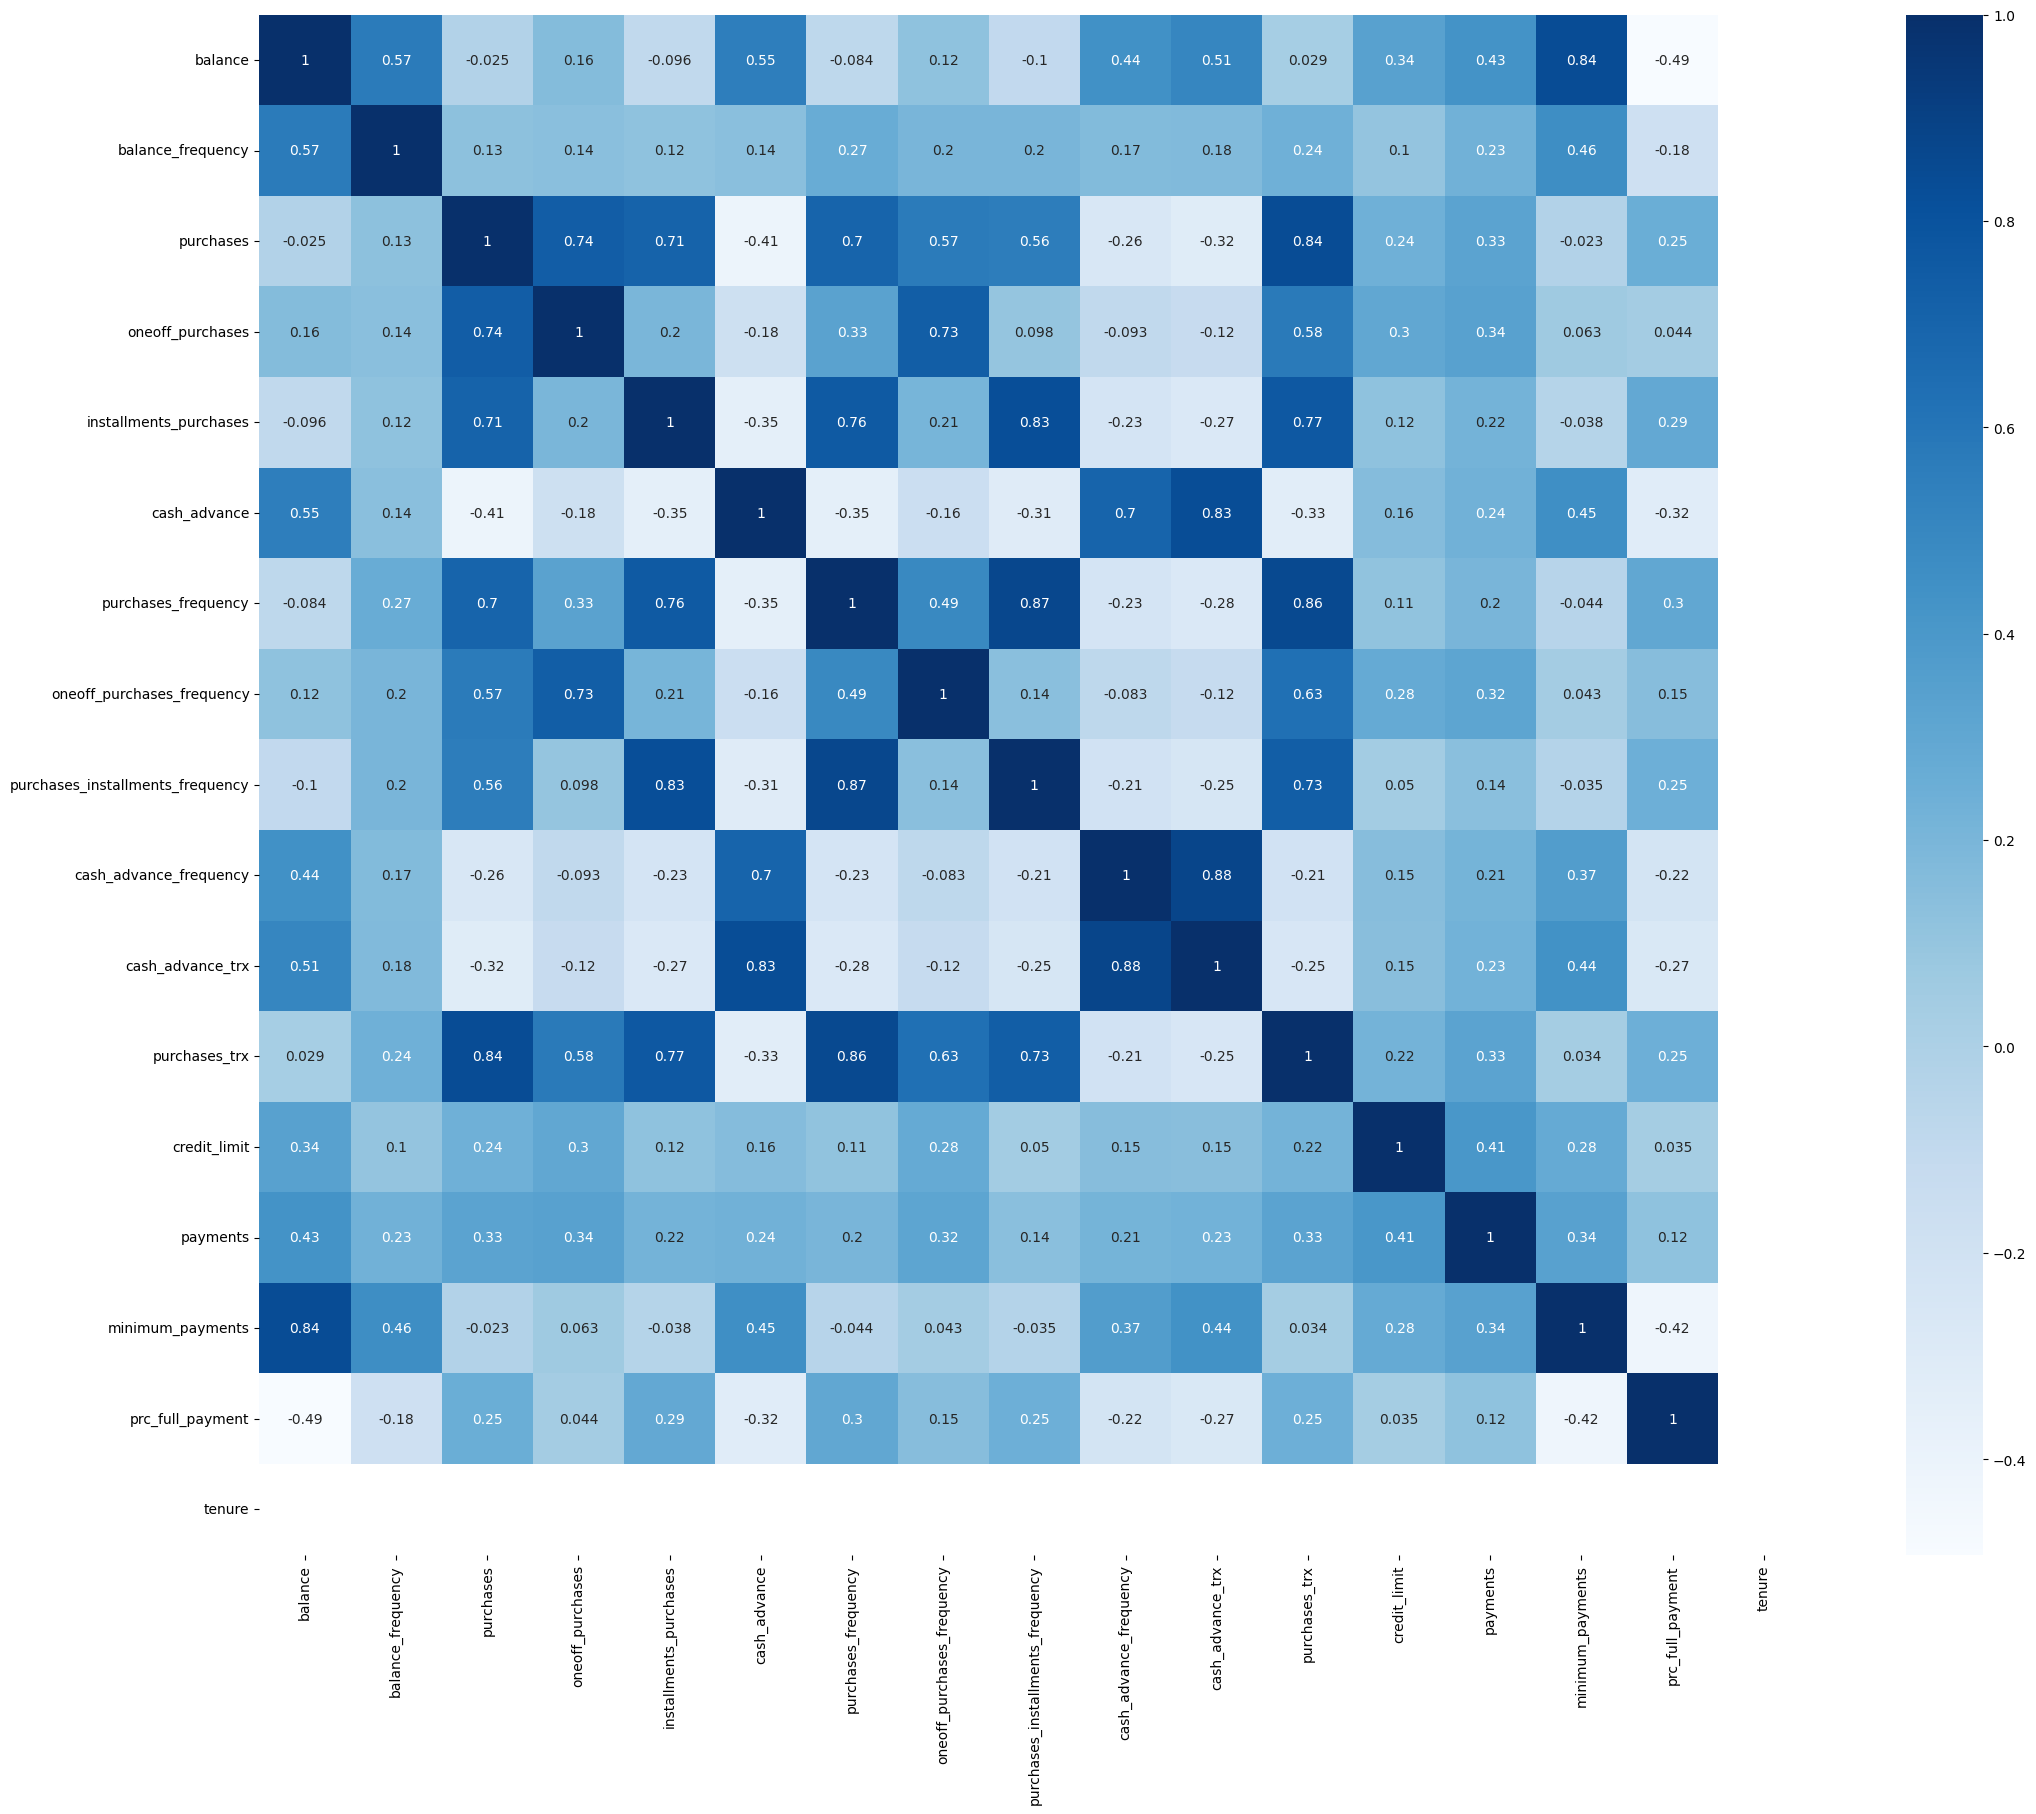

In [27]:
# Assuming df is your DataFrame
correlations = df_model.corr()

# Set the colormap to a minimalist palette (e.g., "Blues" for a blue-to-white gradient)
plt.figure(figsize=(25, 20))
sns.heatmap(correlations, annot=True, cmap="Blues")

In [28]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score



# Scaling numerical features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_model)

In [29]:
# Convert scaled data back to DataFrame for easier handling
scaled_df = pd.DataFrame(scaled_data, columns=df.columns)

In [30]:
scaled_df.head()

balance  balance_frequency  purchases  oneoff_purchases  \
0    -1.31              -1.02      -0.50             -0.93   
1     1.12              -0.20      -1.47             -0.93   
2     0.93               0.62       0.59              1.17   
3     0.64              -1.89       1.01              1.58   
4     0.16               0.62      -1.10             -0.55   

   installments_purchases  cash_advance  purchases_frequency  \
0                    0.05         -0.88                -0.90   
1                   -1.02          1.57                -0.97   
2                   -1.02         -0.88                 1.44   
3                   -1.02          0.22                -0.95   
4                   -1.02         -0.88                -0.95   

   oneoff_purchases_frequency  purchases_installments_frequency  \
0                       -0.58                             -0.78   
1                       -0.58                             -0.81   
2                        2.44                             -0.81   
3                       -0.52                             -0.81   
4                       -0.52                             -0.81   

   cash_advance_frequency  cash_advance_trx  purchases_trx  credit_limit  \
0                   -0.57             -0.70          -0.83         -1.41   
1                    0.32              0.58          -1.09          0.94   
2                   -0.57             -0.70           0.31          1.04   
3                   -0.46             -0.47          -0.98          1.04   
4                   -0.57             -0.70          -0.98         -1.21   

   payments  minimum_payments  prc_full_payment  tenure  
0     -1.10             -0.91             -0.56    0.00  
1      1.50              1.13              0.57    0.00  
2     -0.26              0.53             -0.56    0.00  
3     -2.89             -0.19             -0.56    0.00  
4     -0.19             -0.42             -0.56    0.00

In [31]:
# PCA for dimensionality reduction
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_df)

In [32]:
# Explained variance by PCA
print(f'Explained variance by PCA: {sum(pca.explained_variance_ratio_):.2f}')

Explained variance by PCA: 0.59


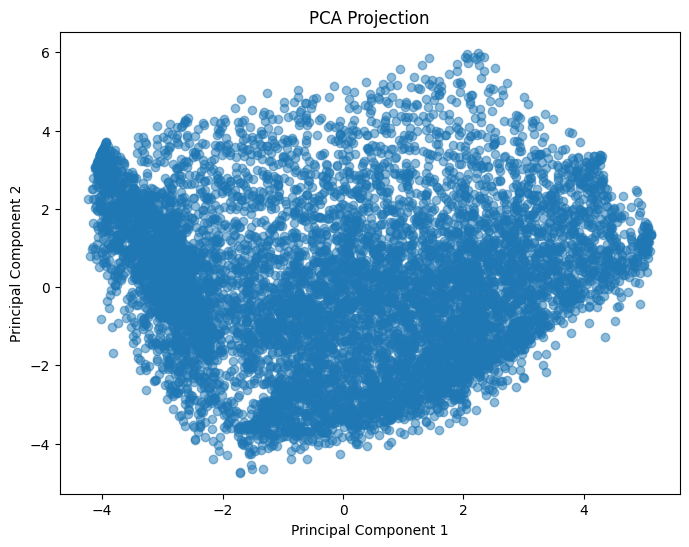

In [33]:
# Visualize PCA result
plt.figure(figsize=(8, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], alpha=0.5)
plt.title('PCA Projection')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [34]:
# t-SNE for visualization of high-dimensional data
tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(scaled_df)

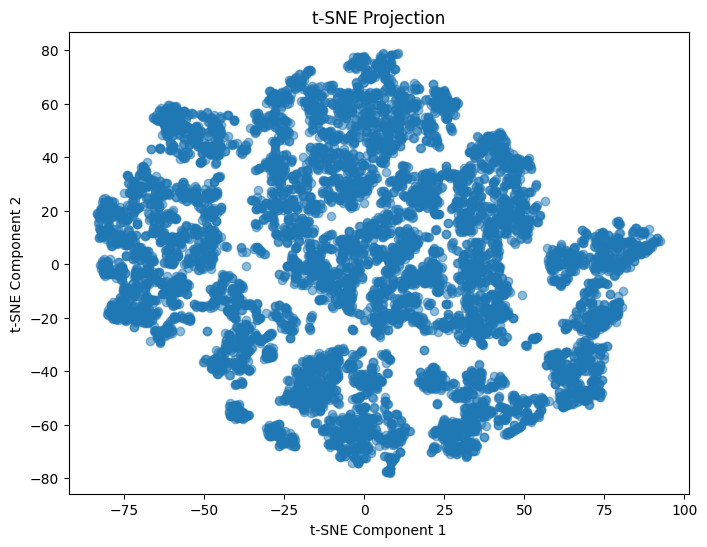

In [35]:
# Visualize t-SNE result
plt.figure(figsize=(8, 6))
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], alpha=0.5)
plt.title('t-SNE Projection')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()

In [36]:
# Step 5: Clustering Algorithms

# K-Means Clustering
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans_labels = kmeans.fit_predict(scaled_df)


# Agglomerative Clustering
agg_cluster = AgglomerativeClustering(n_clusters=5)
agg_labels = agg_cluster.fit_predict(scaled_df)

# Evaluate K-Means
kmeans_silhouette = silhouette_score(scaled_df, kmeans_labels)
kmeans_db_score = davies_bouldin_score(scaled_df, kmeans_labels)

# Evaluate Agglomerative Clustering
agg_silhouette = silhouette_score(scaled_df, agg_labels)
agg_db_score = davies_bouldin_score(scaled_df, agg_labels)


# Print performance metrics
print(f"K-Means - Silhouette Score: {kmeans_silhouette:.2f}, Davies-Bouldin Score: {kmeans_db_score:.2f}")
print(f"Agglomerative - Silhouette Score: {agg_silhouette:.2f}, Davies-Bouldin Score: {agg_db_score:.2f}")

K-Means - Silhouette Score: 0.21, Davies-Bouldin Score: 1.52
Agglomerative - Silhouette Score: 0.14, Davies-Bouldin Score: 1.72


In [37]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer


# Finding the right number of clusters

# Initialize KElbowVisualizer with KMeans
model = KMeans(random_state=23)
elbow_visualizer = KElbowVisualizer(model, k=(2, 10))

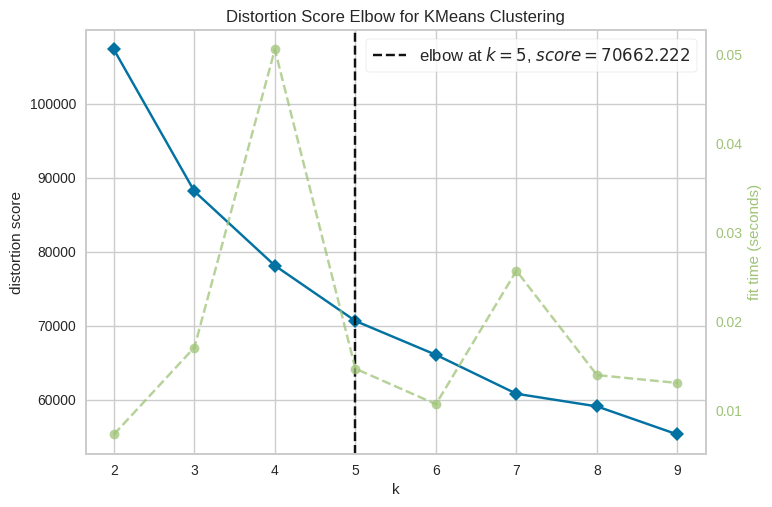

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [38]:
# Fit the visualizer
elbow_visualizer.fit(scaled_df)

# Show the visualizer
elbow_visualizer.show()

In [39]:
# Get the best number of clusters from the visualizer
best_k = elbow_visualizer.elbow_value_
print("The best number of clusters is:", best_k)

The best number of clusters is: 5


In [40]:
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score
from scipy.stats import f_oneway

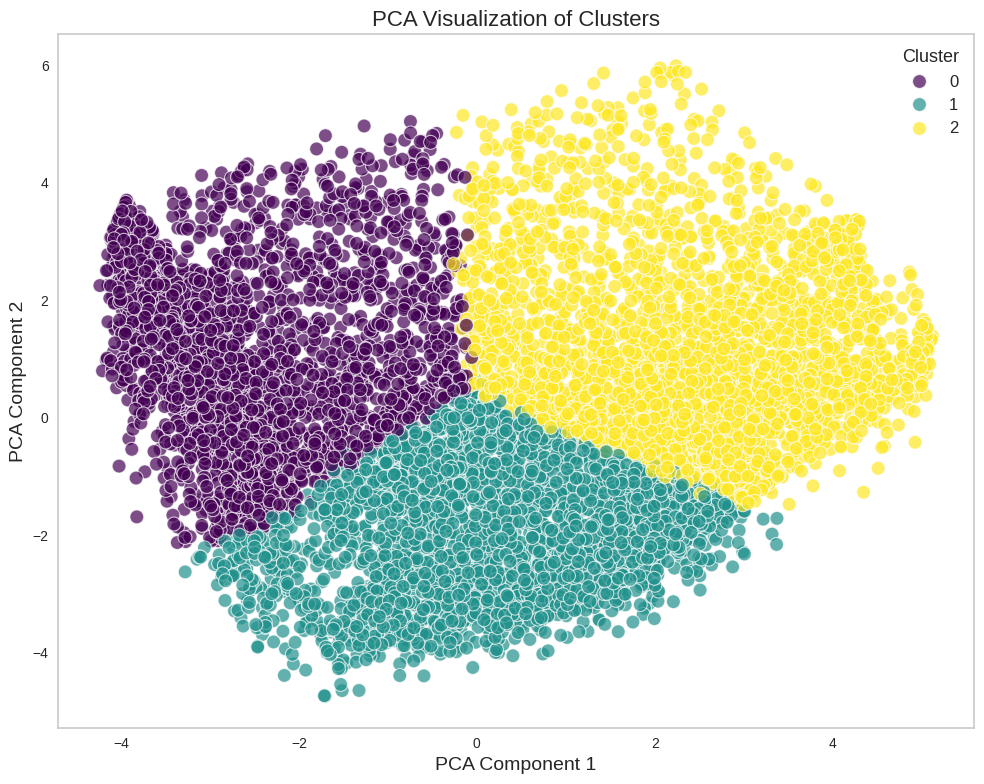

In [45]:
from sklearn.cluster import KMeans

# Perform KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)  # Adjust n_clusters as needed
df['Cluster'] = kmeans.fit_predict(scaled_df)

# PCA for dimensionality reduction
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_df)

# Add PCA results to the DataFrame
df['PCA1'] = pca_result[:, 0]
df['PCA2'] = pca_result[:, 1]

# Visualize clusters in 2D using PCA
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='Cluster', palette='viridis', alpha=0.7, s=100, edgecolor='w')
plt.title('PCA Visualization of Clusters', fontsize=16)
plt.xlabel('PCA Component 1', fontsize=14)
plt.ylabel('PCA Component 2', fontsize=14)
plt.legend(title='Cluster', fontsize=12, title_fontsize='13')
plt.grid()
plt.tight_layout()
plt.show()


/home/hemantmogia/anaconda3/envs/bia_capstone_project/lib/python3.12/site-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


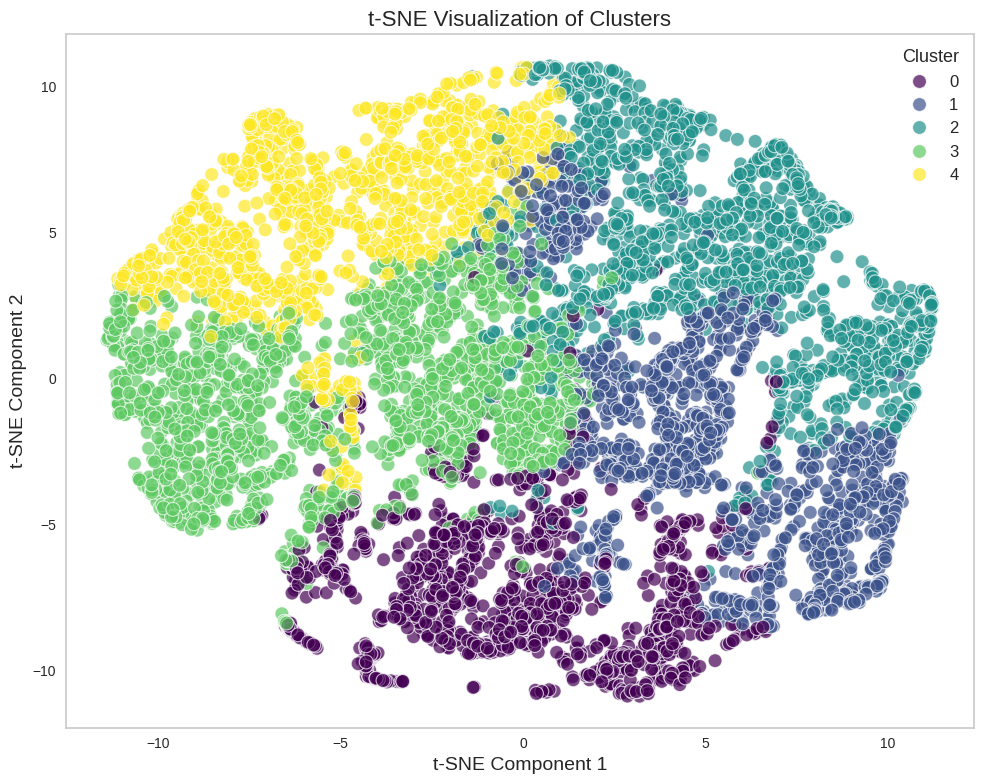

In [67]:
# 5.2: t-SNE for advanced visualization
tsne = TSNE(n_components=2, perplexity=30, n_iter=300)
tsne_result = tsne.fit_transform(scaled_df)

# Add t-SNE results to the DataFrame
df['TSNE1'] = tsne_result[:, 0]
df['TSNE2'] = tsne_result[:, 1]

# Visualize clusters in 2D using t-SNE
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x='TSNE1', y='TSNE2', hue='Cluster', palette='viridis', alpha=0.7, s=100, edgecolor='w')
plt.title('t-SNE Visualization of Clusters', fontsize=16)
plt.xlabel('t-SNE Component 1', fontsize=14)
plt.ylabel('t-SNE Component 2', fontsize=14)
plt.legend(title='Cluster', fontsize=12, title_fontsize='13')
plt.grid()
plt.tight_layout()
plt.show()

In [46]:
# Step 6: Cluster Summary Statistics
cluster_summary = df.groupby('Cluster').mean().reset_index()
print("\nCluster Summary Statistics:")
print(cluster_summary.to_string(index=False))


Cluster Summary Statistics:
 Cluster  balance  balance_frequency  purchases  oneoff_purchases  installments_purchases  cash_advance  purchases_frequency  oneoff_purchases_frequency  purchases_installments_frequency  cash_advance_frequency  cash_advance_trx  purchases_trx  credit_limit  payments  minimum_payments  prc_full_payment  tenure  PCA1  PCA2
       0 2,569.30               0.94     171.33            132.59                   38.88      2,244.13                 0.12                        0.06                              0.06                    0.30              7.47           2.00      4,537.71  1,865.43          1,163.35              0.03   11.41 -2.52  0.92
       1   271.78               0.72     436.90            207.75                  229.64         73.70                 0.48                        0.09                              0.37                    0.02              0.27           7.20      3,204.83    711.31            275.74              0.23   11.36  0.22 -1.99

In [47]:

# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from scipy.spatial.distance import cdist
from itertools import product
from plotly.subplots import make_subplots

# Number of clusters
number_of_cluster = np.arange(2, 11)


# Run PCA with full components
pca_all = PCA(n_components=len(scaled_df.columns), random_state=2022)
pca_all.fit(scaled_df)
variance = pca_all.explained_variance_ratio_
var = np.cumsum(variance) * 100

# Plot for information extracted
fig = px.line(x=np.arange(len(scaled_df.columns)) + 1, y=var, markers=True)
fig.update_xaxes(title_text='# of Features')
fig.update_yaxes(title_text='% Variance Explained')
fig.update_layout(width=900)
fig.show()

In [48]:
# Total information extracted after PCA
print('Information extracted {} %'.format(np.sum(variance[:2]) * 100 / np.sum(variance)))

# Reducing the dimensions of the data 
pca_n = PCA(n_components=2, random_state=2022) 
X_principal = pca_n.fit_transform(scaled_df)
X_principal = pd.DataFrame(X_principal, columns=['P1', 'P2']) 

# Summary statistics
def summary_stats(df):
    return df.describe()

summary = summary_stats(X_principal)
print(summary)

Information extracted 58.539711583393384 %
            P1       P2
count 8,950.00 8,950.00
mean     -0.00     0.00
std       2.33     1.98
min      -4.24    -4.75
25%      -2.19    -1.46
50%       0.03    -0.05
75%       1.89     1.34
max       5.12     5.99


In [49]:
# Plot for dimensions after PCA
fig = go.Figure(go.Scatter(
    x=X_principal['P1'], y=X_principal['P2'], mode='markers'))
fig.update_xaxes(title_text='P1')
fig.update_yaxes(title_text='P2')
fig.update_layout(height=700, width=700, title_text='Principal Component Analysis')
fig.show()

In [50]:
# Agglomerative Clustering
agglo_metrics = {
    'ward': [[], [], [], 'rgb(128,177,211)'],
    'average': [[], [], [], 'rgb(141,211,199)'],
    'complete': [[], [], [], 'rgb(251,128,114)']
}

for linkage in agglo_metrics:
    for n_clusters in number_of_cluster:
        agglo = AgglomerativeClustering(linkage=linkage, n_clusters=n_clusters)
        agglo.fit(X_principal)
        agglo_metrics[linkage][0].append(silhouette_score(X_principal, agglo.labels_))
        agglo_metrics[linkage][1].append(davies_bouldin_score(X_principal, agglo.labels_))
        agglo_metrics[linkage][2].append(calinski_harabasz_score(X_principal, agglo.labels_))

# Silhouette score between each method
fig = make_subplots(rows=3, cols=1, shared_xaxes=True, vertical_spacing=.01)

for linkage in agglo_metrics:
    for j, metric in zip(range(1, 4), ['Silhouette', 'Davies Bouldin', 'Calinski-Harabasz']):
        fig.append_trace(go.Scatter(
            x=list(number_of_cluster), 
            y=agglo_metrics[linkage][j - 1], 
            name=linkage.title(), 
            legendgroup=linkage, 
            line_color=agglo_metrics[linkage][-1],
            showlegend=False if j != 1 else True), 
            row=j, col=1)
        fig.update_yaxes(title_text=metric, row=j, col=1)

fig.update_xaxes(title_text='Number of Clusters', row=3)
fig.update_layout(height=800, width=900, legend_title_text='Metrics', title_text='Agglomerative Clustering Metric Scores')
fig.show()



In [51]:
# Comparing results
compare_agg = pd.DataFrame({
    'Method': ['Ward', 'Average', 'Complete'],
    'n Cluster': ['7', '4', '7'],
    'Silhouette Score': [agglo_metrics['ward'][0][5], agglo_metrics['average'][0][2], agglo_metrics['complete'][0][5]],
    'Davies Score': [agglo_metrics['ward'][1][5], agglo_metrics['average'][1][2], agglo_metrics['complete'][1][5]],
    'Calinski Score': [agglo_metrics['ward'][2][5], agglo_metrics['average'][2][2], agglo_metrics['complete'][2][5]]
})

print(compare_agg)

     Method n Cluster  Silhouette Score  Davies Score  Calinski Score
0      Ward         7              0.31          0.88        6,964.30
1   Average         4              0.34          0.81        5,406.00
2  Complete         7              0.28          0.83        5,660.19


In [52]:
# Creating new DataFrame for Agglomerative Clustering
df_dend = X_principal.copy()
agg_ward = AgglomerativeClustering(n_clusters=7, linkage='ward')
df_dend['ward'] = agg_ward.fit_predict(X_principal)

agg_average = AgglomerativeClustering(n_clusters=4, linkage='average')
df_dend['average'] = agg_average.fit_predict(X_principal)

agg_complete = AgglomerativeClustering(n_clusters=7, linkage='complete')
df_dend['complete'] = agg_complete.fit_predict(X_principal)

# Showing DataFrame
print(df_dend.head(10))

     P1    P2  ward  average  complete
0 -1.05 -3.06     5        2         5
1 -2.83  1.41     4        0         2
2  1.48  1.22     6        1         1
3 -1.03 -1.13     0        2         5
4 -1.64 -1.50     0        2         5
5  0.84  0.46     6        2         2
6  4.98  1.40     1        1         1
7  1.54 -0.05     6        2         0
8  0.40 -0.09     6        2         2
9  0.04 -1.38     0        2         0


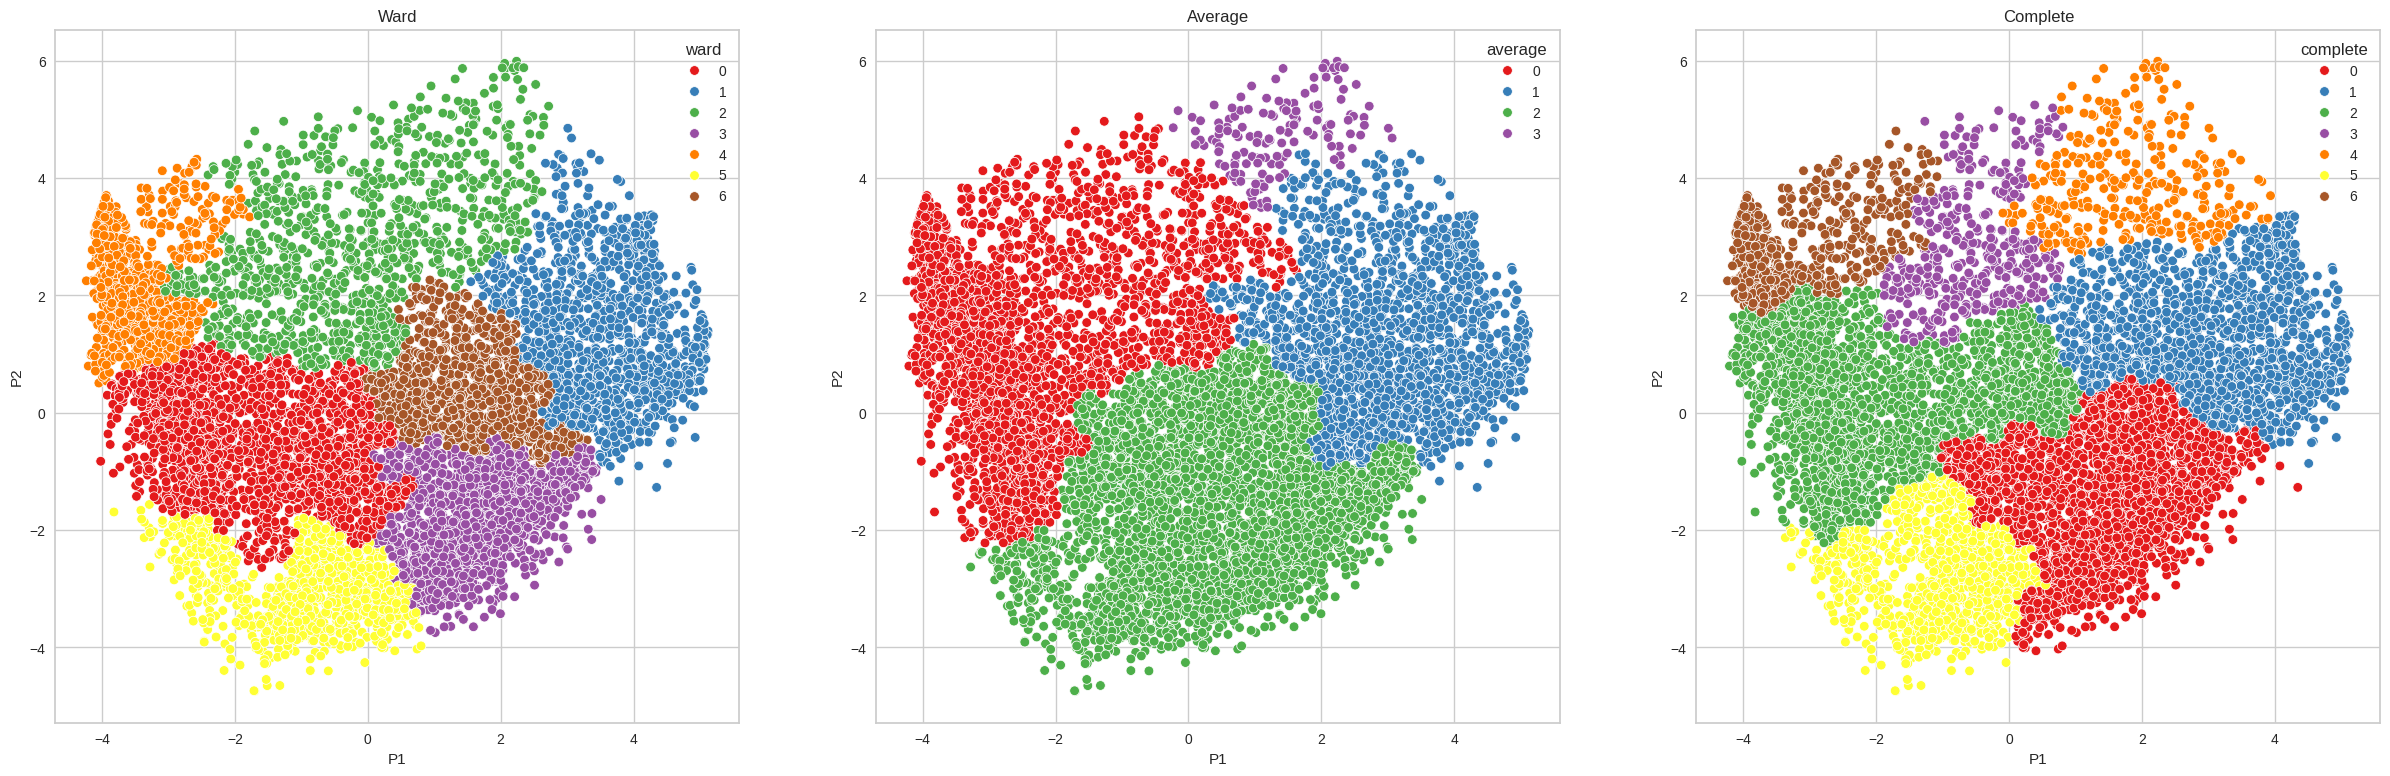

In [53]:
# Creating visualization to compare results from the best score for each Agglomerative Clustering method
plt.figure(figsize=(30, 9))
for idx, i in enumerate(['ward', 'average', 'complete'], start=1):
    plt.subplot(1, 3, idx)
    sns.scatterplot(x='P1', y='P2', hue=i, data=df_dend, palette="Set1")
    plt.title(i.title())
plt.show()

# K-Means Clustering
avg_withinSS = []

In [54]:
# Create loop to run the algorithm
for i in number_of_cluster:
    kmeans = KMeans(n_clusters=i, random_state=2022)
    kmeans.fit(X_principal)
    centroids = kmeans.cluster_centers_

    D_k = cdist(X_principal, centroids, 'euclidean')
    dist = np.min(D_k, axis=1)
    avg_withinSS.append(sum(dist) / X_principal.shape[0])

# Creating plot for elbow method visualization
fig = px.line(x=number_of_cluster, y=avg_withinSS, markers=True)
fig.update_xaxes(title_text='Number of Clusters')
fig.update_yaxes(title_text='Average Within Sum of Square')
fig.update_layout(width=900)
fig.show()

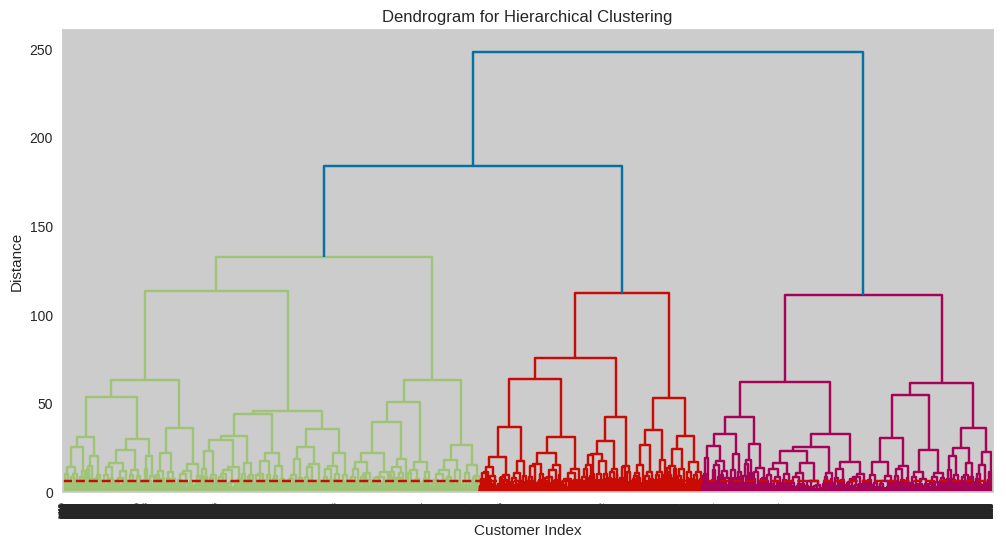

In [77]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Perform hierarchical clustering
linked = linkage(scaled_df, method='ward')  # Using Ward's method

# Create a dendrogram
plt.figure(figsize=(12, 6))
dendrogram(linked,
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=True)
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Customer Index')
plt.ylabel('Distance')
# plt.axhline(y=6, color='r', linestyle='--')  # Optional: Adjust this line based on your analysis
plt.show()

In [79]:
# instantiate linkage object with scaled data and consider 'ward' linkage method 
link_mat = linkage(scaled_df, method = 'ward')     

# print first 10 observations of the linkage matrix 'link_mat'
print(link_mat[0:10])

[[6.43000000e+02 4.14000000e+03 0.00000000e+00 2.00000000e+00]
 [1.38000000e+02 1.58500000e+03 0.00000000e+00 2.00000000e+00]
 [1.77800000e+03 4.42600000e+03 0.00000000e+00 2.00000000e+00]
 [8.83000000e+02 2.45400000e+03 0.00000000e+00 2.00000000e+00]
 [1.91200000e+03 3.69500000e+03 1.22198535e-02 2.00000000e+00]
 [5.91000000e+02 6.52000000e+02 2.74510797e-02 2.00000000e+00]
 [3.12000000e+03 5.17800000e+03 3.55266975e-02 2.00000000e+00]
 [5.21900000e+03 8.44200000e+03 4.52203619e-02 2.00000000e+00]
 [6.04400000e+03 7.25700000e+03 4.52579408e-02 2.00000000e+00]
 [4.41900000e+03 5.58500000e+03 4.55449354e-02 2.00000000e+00]]


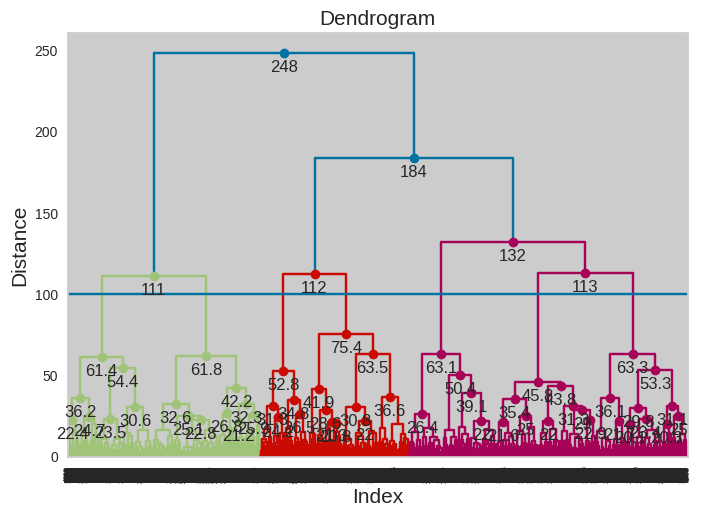

In [80]:
# plot the dendrogram
# pass the linkage matrix
dendro = dendrogram(link_mat)

# annotate the distance on the y-axis for distance > 20
# 'dendro' returns the dictionary containing x,y coordinates and the color list for each merge
# the 'icoord' returns the x-coordinates for the rectangle that represents the merging
# the 'dcoord' returns the y-coordinates (distance) for the each corner of the rectangle that represents the merging
for i, d, c in zip(dendro['icoord'], dendro['dcoord'], dendro['color_list']):
    
    # consider 'x' as the x-coordinate of the average distance on the merging line
    x = sum(i[1:3])/2
    
    # consider 'y' as the distance at which the merging occurs 
    y = d[1]
    
    # pass the if-condition for annotation
    if y > 20:
        
        # plot the bullet and annotate the merging distance 'y'
        plt.plot(x, y, 'o', c=c)
        
        # pass the conditions to annotate the distance
        plt.annotate("%.3g" % y, (x, y), xytext=(0, -5), textcoords='offset points', va='top', ha='center')

# plot the line to cut the dendrogram
plt.axhline(y = 100)

# set the axes and plot labels
# set the font size using 'fontsize'
plt.title('Dendrogram', fontsize = 15)
plt.xlabel('Index', fontsize = 15)
plt.ylabel('Distance', fontsize = 15)

# display the plot
plt.show()

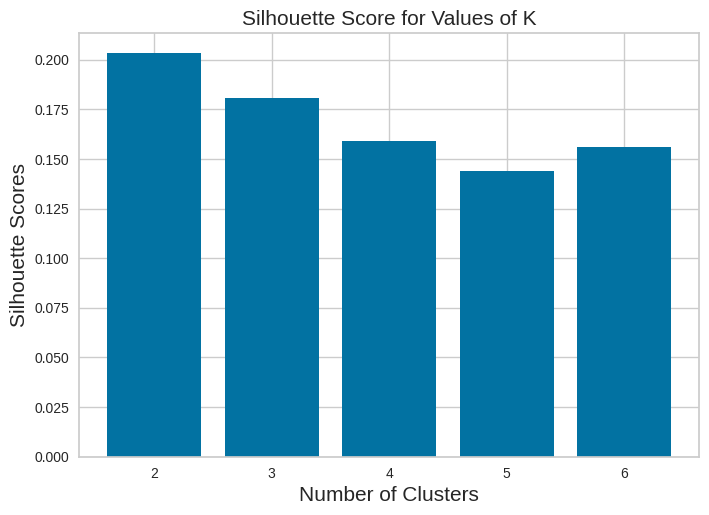

In [81]:
# consider different values of K
K = [2,3,4,5,6]

# consider an empty list tot store the Silhouette score
silhouette_scores = [] 

# consider a for loop to perform clustering for different values of K
for i in K:
    
    # instantiate clustering for each value of K
    model = AgglomerativeClustering(n_clusters = i) 
    
    # calculate the Silhouette score and append to the list 'silhouette_scores'
    silhouette_scores.append(silhouette_score(scaled_df, model.fit_predict(scaled_df))) 
    
# plot the Silhouette score for different K
plt.bar(K, silhouette_scores) 

# set the axes and plot labels
# set the font size using 'fontsize'
plt.title('Silhouette Score for Values of K', fontsize = 15)
plt.xlabel('Number of Clusters', fontsize = 15) 
plt.ylabel('Silhouette Scores', fontsize = 15)

# display the plot
plt.show()

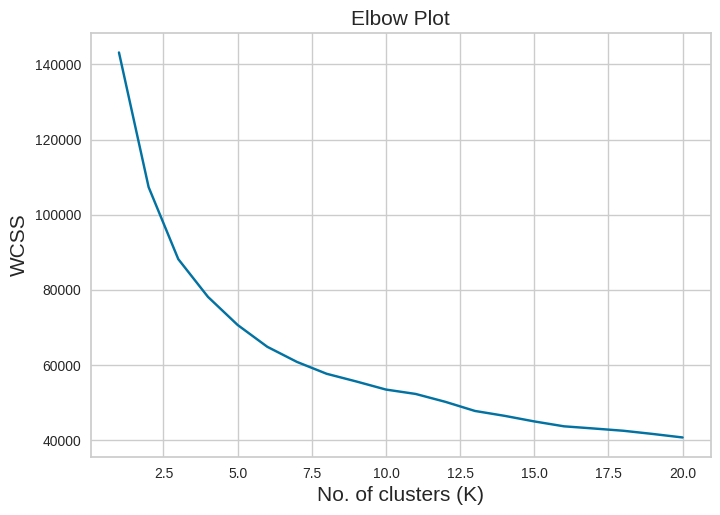

In [82]:
# create several cluster combinations ranging from 1 to 20 and observe the wcss (Within Cluster Sum of Squares) for each cluster
# consider an empty list to store the WCSS
wcss  = []

# use for loop to perform K-means with different values of K
# set the 'random_state' to obtain the same centroid initialization for each code run
# fit the model on scaled data
# append the value of WCSS for each K to the list 'wcss'
# the 'inertia_' retuns the WCSS for specific value of K
for i in range(1,21):
    kmeans = KMeans(n_clusters = i, random_state = 10)
    kmeans.fit(scaled_df)
    wcss.append(kmeans.inertia_)


# visualize the elbow plot to get the optimal value of K
plt.plot(range(1,21), wcss)

# set the axes and plot labels
# set the font size using 'fontsize'
plt.title('Elbow Plot', fontsize = 15)
plt.xlabel('No. of clusters (K)', fontsize = 15)
plt.ylabel('WCSS', fontsize = 15)

# display the plot
plt.show()

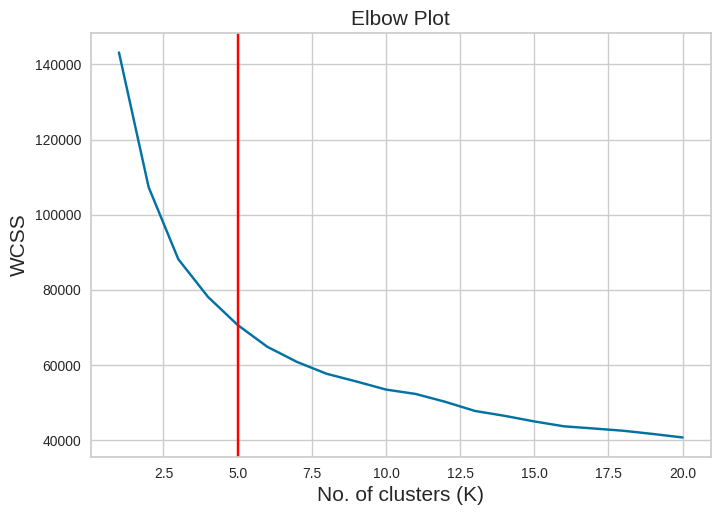

In [83]:
# visualize the elbow plot to get the optimal value of K
plt.plot(range(1,21), wcss)

# set the axes and plot labels
# set the font size using 'fontsize'
plt.title('Elbow Plot', fontsize = 15)
plt.xlabel('No. of clusters (K)', fontsize = 15)
plt.ylabel('WCSS', fontsize = 15)

# plot a vertical line at the elbow
plt.axvline(x = 5, color = 'red')

# display the plot
plt.show()

In [84]:
# create a list for different values of K
n_clusters = [2, 3, 4, 5, 6]

# use 'for' loop to build the clusters
# 'random_state' returns the same sample each time you run the code  
# fit and predict on the scaled data
# 'silhouette_score' function computes the silhouette score for each K
for K in n_clusters:
    cluster = KMeans (n_clusters= K, random_state= 10)
    predict = cluster.fit_predict(scaled_df)
    score = silhouette_score(scaled_df, predict, random_state= 10)
    print ("For {} clusters the silhouette score is {})".format(K, score))

For 2 clusters the silhouette score is 0.2335332649063339)
For 3 clusters the silhouette score is 0.22007337146132358)
For 4 clusters the silhouette score is 0.2035422490960966)
For 5 clusters the silhouette score is 0.19990860753573933)
For 6 clusters the silhouette score is 0.20450884174313735)


In [85]:
# import 'Pandas' 
import pandas as pd 

# import 'Numpy' 
import numpy as np

# import subpackage of Matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# import 'Seaborn' 
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')
 
# to display the float values upto 6 decimal places     
pd.options.display.float_format = '{:.6f}'.format

# import functions to perform scaling and normalization
from sklearn.preprocessing import StandardScaler

# import various functions from sklearn 
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.cluster import KMeans

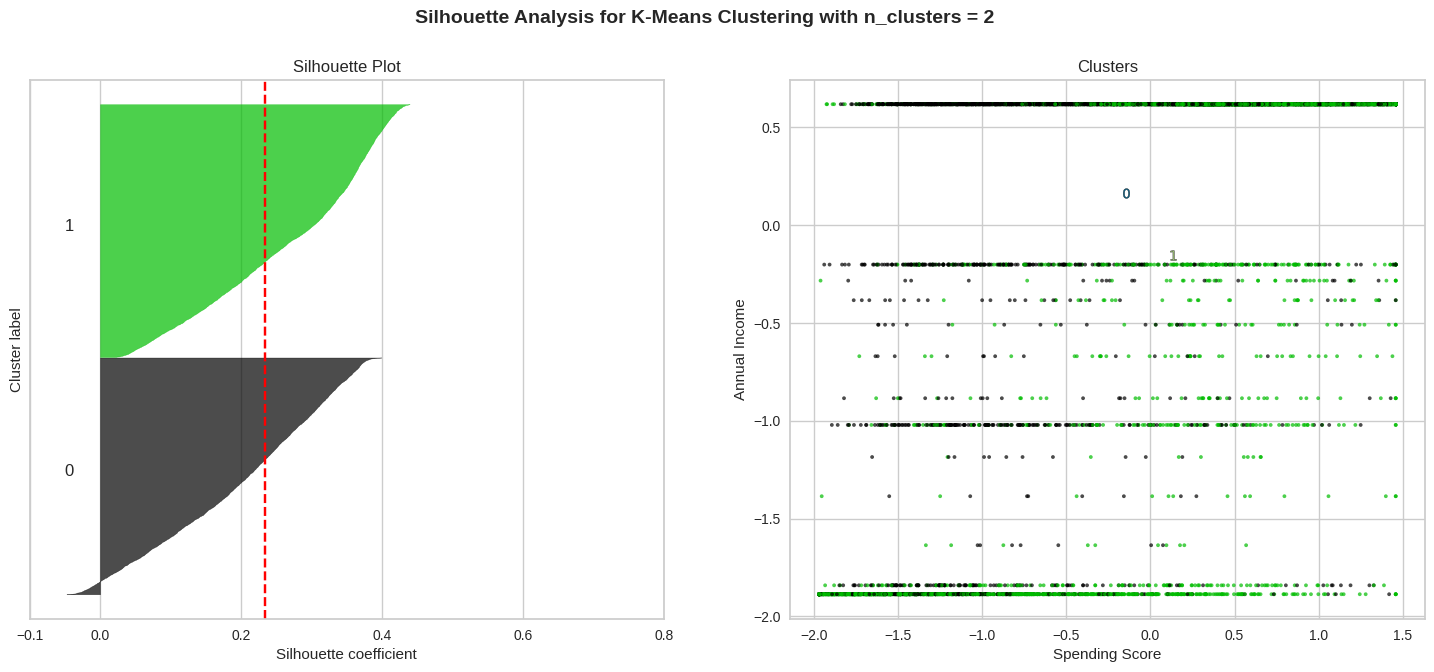

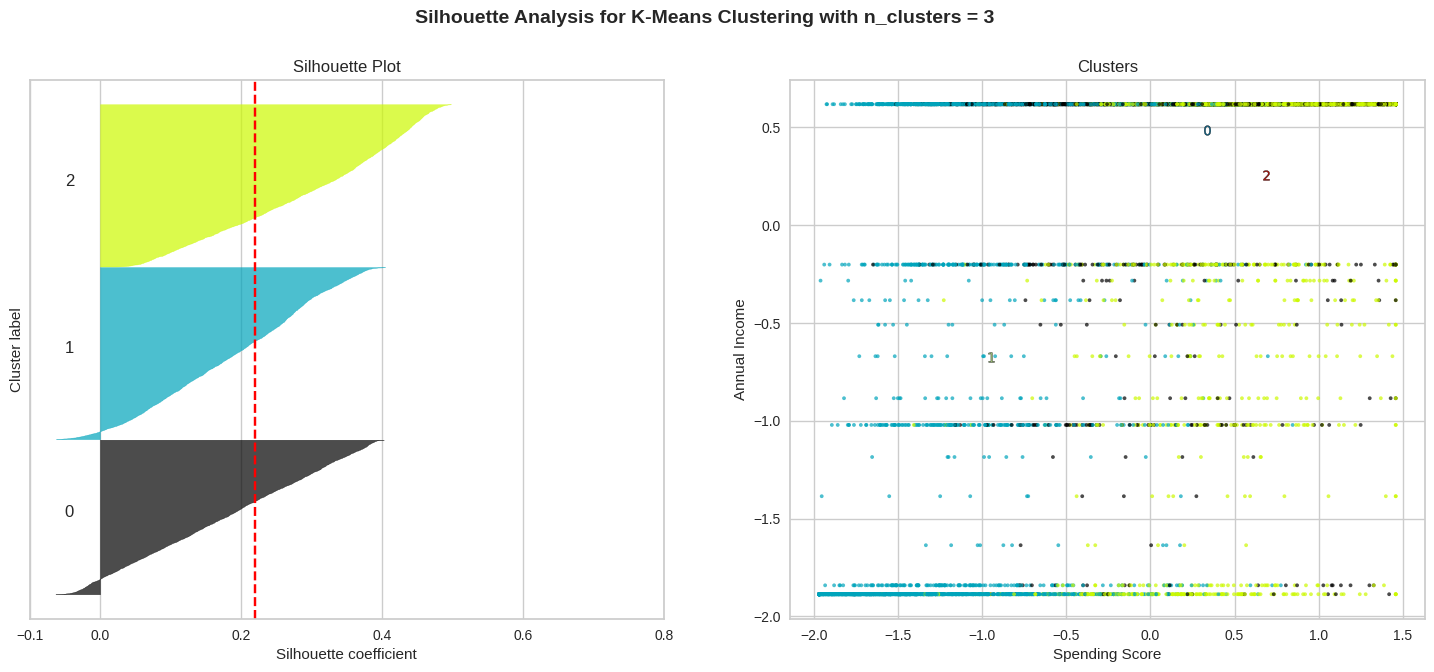

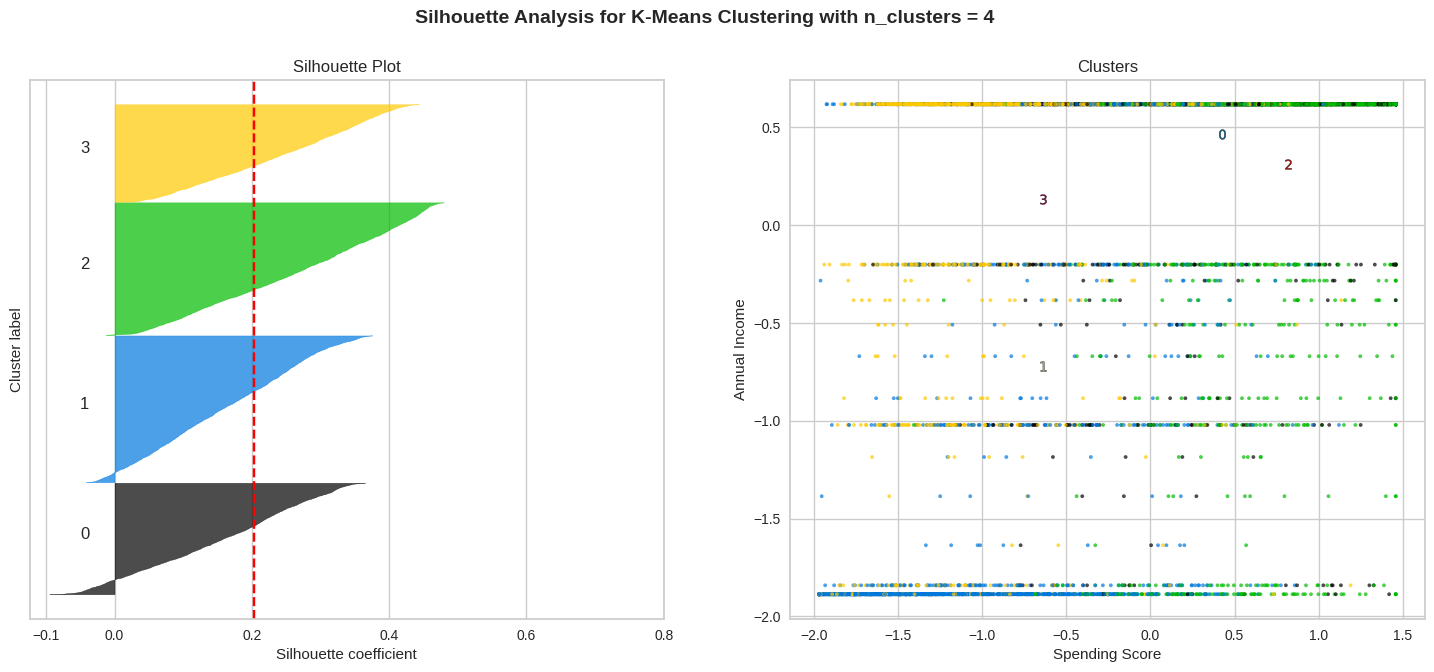

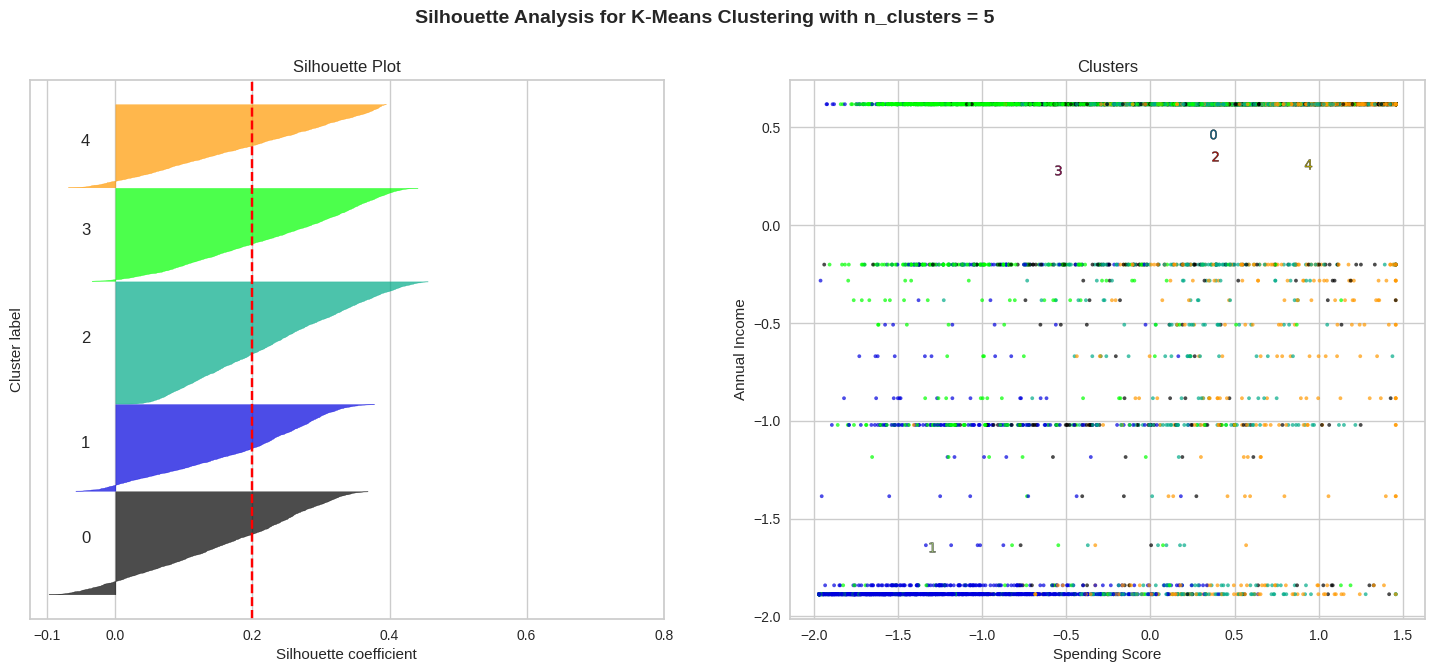

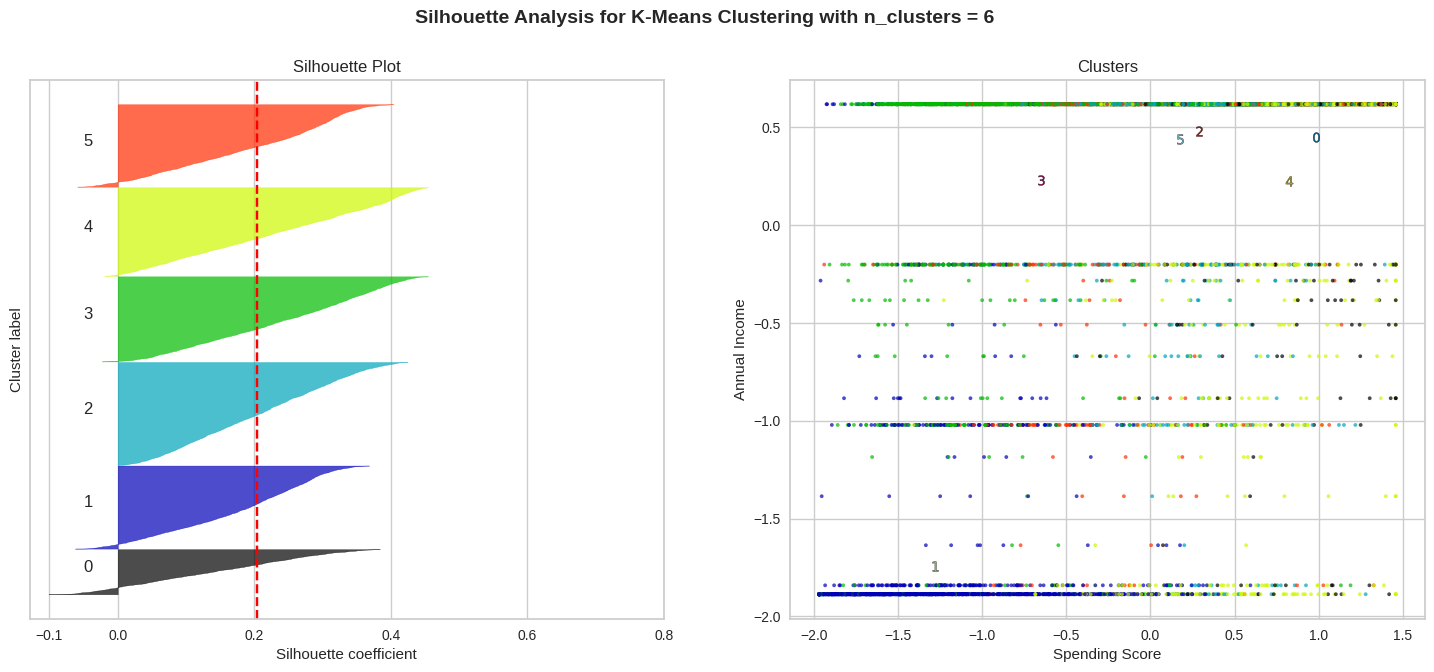

In [86]:
# consider the number of clusters
n_clusters = [2, 3, 4, 5, 6]

# consider an array of the data
X = np.array(scaled_df)

# for each value of K, plot the silhouette plot the clusters formed
for K in n_clusters:
    
    # create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    
    # set the figure size
    fig.set_size_inches(18, 7)

    # the 1st subplot is the silhouette plot
    # initialize the cluster with 'K' value and a random generator
    model = KMeans(n_clusters = K, random_state = 10)
    
    # fit and predict on the scaled data
    cluster_labels = model.fit_predict(X)

    # the 'silhouette_score()' gives the average value for all the samples
    silhouette_avg = silhouette_score(X, cluster_labels)
    
    # Compute the silhouette coefficient for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(K):
        
        # aggregate the silhouette scores for samples belonging to cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        
        # sort the silhouette coefficient
        ith_cluster_silhouette_values.sort()
        
        # calculate the size of the cluster
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        # color each cluster 
        color = cm.nipy_spectral(float(i) / K)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # compute the new y_lower for next plot
        y_lower = y_upper + 10 

    # set the axes and plot label
    ax1.set_title("Silhouette Plot")
    ax1.set_xlabel("Silhouette coefficient")
    ax1.set_ylabel("Cluster label")

    # plot the vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    # clear the y-axis ticks
    ax1.set_yticks([])  
    
    # set the ticks for x-axis 
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8])

    
    # 2nd plot showing the actual clusters formed
    # consider different color for each cluster
    colors = cm.nipy_spectral(cluster_labels.astype(float) / K)
    
    # plot a scatter plot to visualize the clusters
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7, c=colors, edgecolor='k')

    # label the cluster centers
    centers = model.cluster_centers_
    
    # display the cluster center with cluster number
    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50, edgecolor='k')
    
    # add the axes and plot title
    ax2.set_title("Clusters")
    ax2.set_xlabel("Spending Score")
    ax2.set_ylabel("Annual Income")
    
    # set the common title for subplots
    plt.suptitle(("Silhouette Analysis for K-Means Clustering with n_clusters = %d" % K), fontsize=14, 
                 fontweight='bold')

# display the plot
plt.show()

In [55]:
# Adding original feature data to the clustered data
df_dend = df_dend.join(df, how='left')

# Summarizing clusters for each method
for method in ['ward', 'average', 'complete']:
    print(f"\nCluster summary for {method.title()} linkage:")
    print(df_dend.groupby(method).mean())



Cluster summary for Ward linkage:
        P1    P2  average  complete  balance  balance_frequency  purchases  \
ward                                                                         
0    -1.80 -0.50     0.84      1.92 1,169.86               0.90     184.68   
1     3.56  1.36     1.00      1.15 1,866.43               0.99   3,858.86   
2    -0.20  2.80     0.49      3.34 3,905.41               0.98   1,379.00   
3     1.67 -1.79     1.97      0.01   130.16               0.82     676.75   
4    -3.40  2.13     0.00      4.19 4,024.75               0.98      46.47   
5    -0.98 -3.01     1.88      4.39    51.72               0.45     143.57   
6     1.51  0.38     1.50      0.79 1,196.53               0.98   1,231.02   

      oneoff_purchases  installments_purchases  cash_advance  \
ward                                                           
0               149.00                   35.88        771.26   
1             2,432.84                1,426.51        152.39   
2     

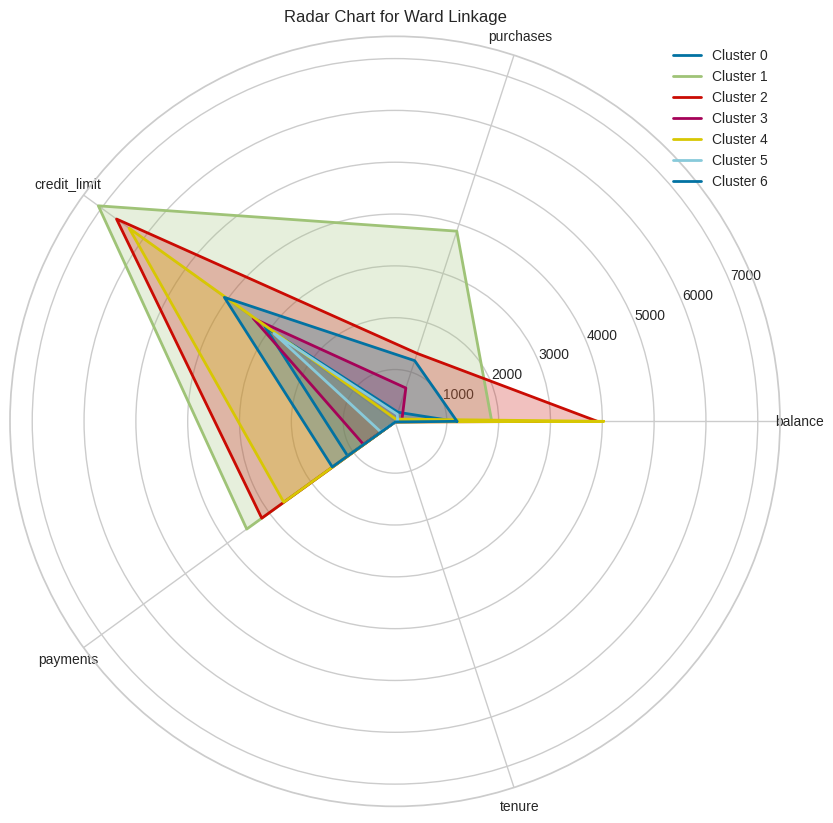

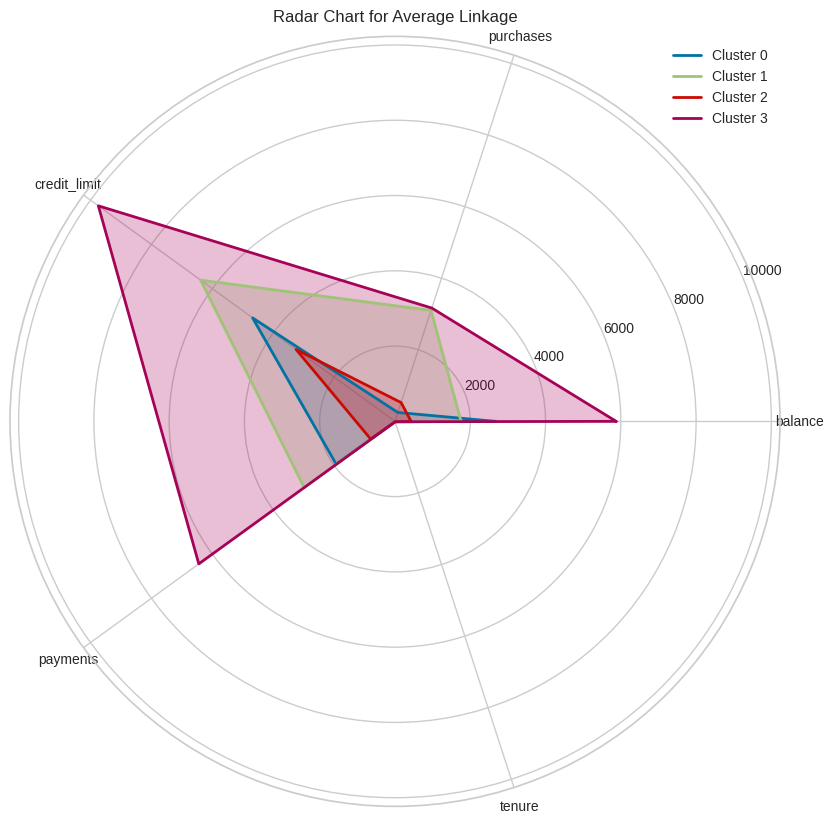

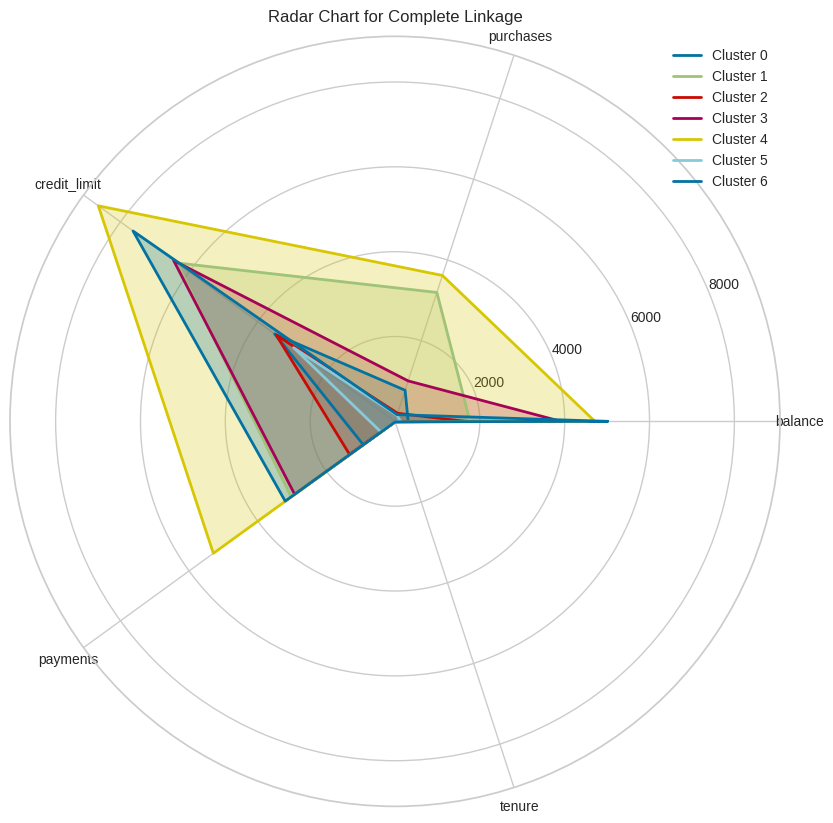

In [56]:
from math import pi

# Radar chart for a specific linkage method
def plot_radar(df_dend, method):
    cluster_means = df_dend.groupby(method).mean()

    # Normalizing data
    data = cluster_means[['balance', 'purchases', 'credit_limit', 'payments', 'tenure']]

    categories = list(data.columns)
    N = len(categories)

    fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))
    
    for index, row in data.iterrows():
        values = row.tolist()
        values += values[:1]
        angles = [n / float(N) * 2 * pi for n in range(N)]
        angles += angles[:1]
        
        ax.plot(angles, values, label=f'Cluster {index}', linewidth=2)
        ax.fill(angles, values, alpha=0.25)
    
    ax.set_xticks([n / float(N) * 2 * pi for n in range(N)])
    ax.set_xticklabels(categories)
    ax.set_title(f'Radar Chart for {method.title()} Linkage')
    ax.legend(loc='upper right')
    
    plt.show()

# For each linkage method
plot_radar(df_dend, 'ward')
plot_radar(df_dend, 'average')
plot_radar(df_dend, 'complete')


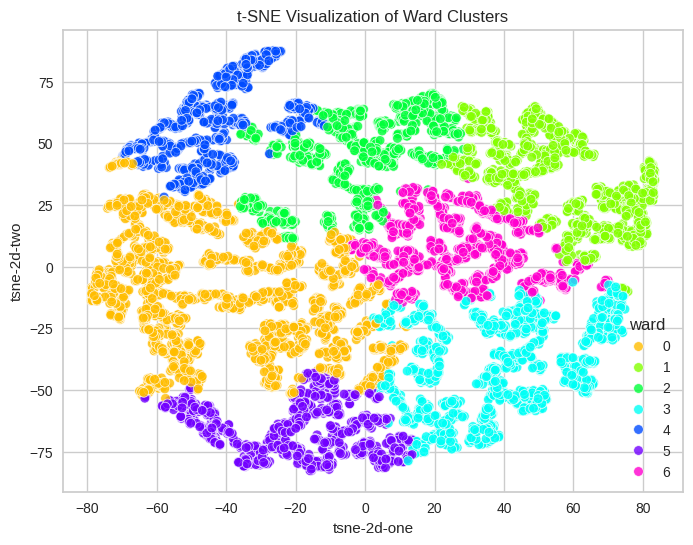

In [66]:
from sklearn.manifold import TSNE

# Perform t-SNE for 2D visualization
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(df_dend[['PCA1', 'PCA2']])  # Using PCA components for t-SNE

df_dend['tsne-2d-one'] = tsne_results[:, 0]
df_dend['tsne-2d-two'] = tsne_results[:, 1]

# Visualize t-SNE
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two", hue='ward',
    palette=sns.color_palette("hsv", len(df_dend['ward'].unique())),
    data=df_dend, legend="full", alpha=0.8
)
plt.title('t-SNE Visualization of Ward Clusters')
plt.show()


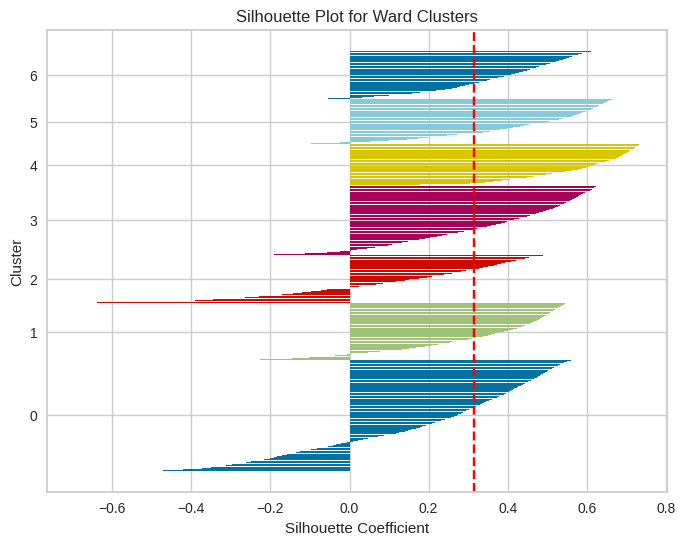

In [67]:
from sklearn.metrics import silhouette_samples, silhouette_score
import numpy as np

# Calculate silhouette scores for each sample
silhouette_vals = silhouette_samples(df_dend[['PCA1', 'PCA2']], df_dend['ward'])

# Plot silhouette scores
y_ticks = []
y_lower, y_upper = 0, 0
plt.figure(figsize=(8, 6))
for i, cluster in enumerate(np.unique(df_dend['ward'])):
    cluster_silhouette_vals = silhouette_vals[df_dend['ward'] == cluster]
    cluster_silhouette_vals.sort()
    y_upper += len(cluster_silhouette_vals)
    plt.barh(range(y_lower, y_upper), cluster_silhouette_vals, edgecolor='none')
    y_ticks.append((y_lower + y_upper) / 2)
    y_lower += len(cluster_silhouette_vals)

plt.axvline(x=np.mean(silhouette_vals), color="red", linestyle="--")
plt.yticks(y_ticks, np.unique(df_dend['ward']))
plt.ylabel('Cluster')
plt.xlabel('Silhouette Coefficient')
plt.title('Silhouette Plot for Ward Clusters')
plt.show()


In [68]:
# Example of trying a different number of clusters
agg_ward_adjusted = AgglomerativeClustering(n_clusters=5, linkage='ward')
df_dend['ward_adjusted'] = agg_ward_adjusted.fit_predict(df_dend[['PCA1', 'PCA2']])


In [69]:
from sklearn.mixture import GaussianMixture

# Fit GMM and predict probabilities
gmm = GaussianMixture(n_components=7, covariance_type='full', random_state=42)
df_dend['gmm_cluster'] = gmm.fit_predict(df_dend[['PCA1', 'PCA2']])

# Add probabilities for each cluster
gmm_probabilities = gmm.predict_proba(df_dend[['PCA1', 'PCA2']])
df_gmm_probs = pd.DataFrame(gmm_probabilities, columns=[f'Cluster_{i}_prob' for i in range(gmm.n_components)])
df_dend = pd.concat([df_dend, df_gmm_probs], axis=1)


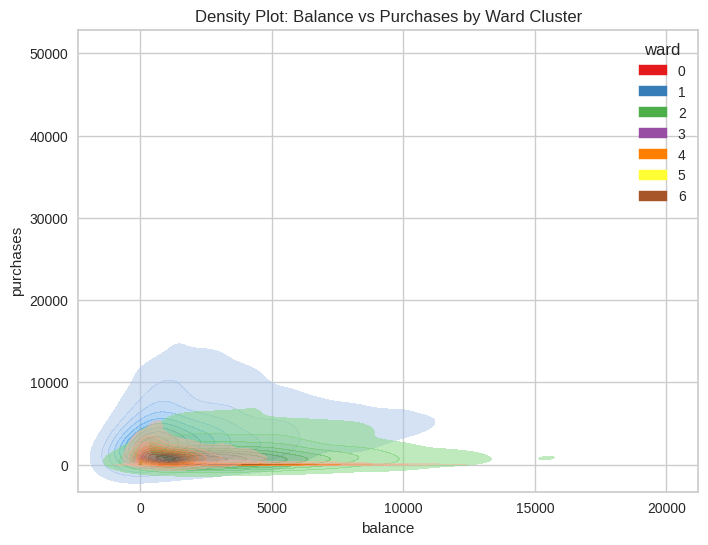

In [70]:
# KDE plot to visualize density
plt.figure(figsize=(8, 6))
sns.kdeplot(x=df_dend['balance'], y=df_dend['purchases'], hue=df_dend['ward'], fill=True, common_norm=False, palette="Set1", alpha=0.5)
plt.title('Density Plot: Balance vs Purchases by Ward Cluster')
plt.show()


In [71]:
# Get summary statistics for each cluster
cluster_features = ['balance', 'purchases', 'credit_limit', 'payments', 'cash_advance']

# Ward linkage summary
ward_summary = df_dend.groupby('ward')[cluster_features].mean()

# Average linkage summary
average_summary = df_dend.groupby('average')[cluster_features].mean()

# Complete linkage summary
complete_summary = df_dend.groupby('complete')[cluster_features].mean()

print("Ward Clustering Summary:\n", ward_summary)
print("\nAverage Clustering Summary:\n", average_summary)
print("\nComplete Clustering Summary:\n", complete_summary)


Ward Clustering Summary:
       balance  purchases  credit_limit  payments  cash_advance
ward                                                          
0    1,169.86     184.68      3,098.39  1,131.09        771.26
1    1,866.43   3,858.86      7,075.81  3,536.39        152.39
2    3,905.41   1,379.00      6,642.32  3,178.21      2,994.66
3      130.16     676.75      3,383.48    753.70          6.53
4    4,024.75      46.47      6,342.57  2,652.94      3,834.72
5       51.72     143.57      2,886.35    341.74        148.22
6    1,196.53   1,231.02      4,069.22  1,496.26        191.49

Average Clustering Summary:
          balance  purchases  credit_limit  payments  cash_advance
average                                                          
0       2,670.09     247.93      4,676.68  1,933.48      2,297.32
1       1,754.56   3,098.37      6,381.55  2,984.82        268.36
2         427.57     524.69      3,249.79    799.56         98.85
3       5,876.68   3,165.31      9,743.17  6,44

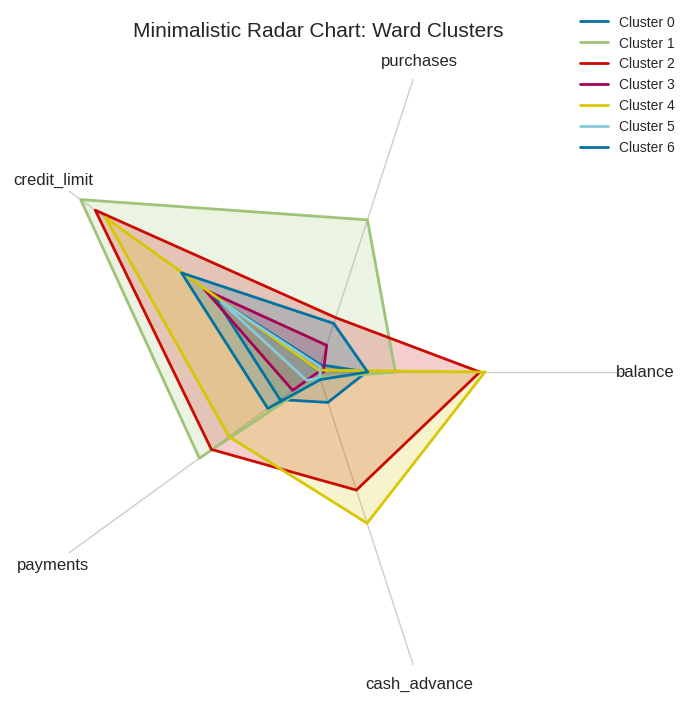

In [73]:
# Minimalistic radar chart for Ward clusters
minimalistic_radar(df_dend, 'ward')


In [75]:
# Get summary statistics for each cluster (complete linkage)
cluster_features = [
    'balance', 'purchases', 'oneoff_purchases', 'installments_purchases', 'cash_advance', 
    'purchases_frequency', 'credit_limit', 'payments', 'minimum_payments', 'prc_full_payment'
]

# Calculate the mean values for the key features per cluster
complete_summary = df_dend.groupby('complete')[cluster_features].mean()
complete_summary['count'] = df_dend.groupby('complete').size()  # Count of customers in each cluster
print(complete_summary)


          balance  purchases  oneoff_purchases  installments_purchases  \
complete                                                                 
0          310.47     770.23            318.25                  452.55   
1        1,768.64   3,194.30          1,984.70                1,210.06   
2        1,657.15     200.45            144.66                   55.96   
3        3,913.00   1,002.51            718.79                  283.72   
4        4,712.71   3,616.66          2,261.38                1,355.29   
5          127.10     152.50            101.07                   51.47   
6        5,010.64     166.05            130.69                   35.53   

          cash_advance  purchases_frequency  credit_limit  payments  \
complete                                                              
0                20.80                 0.73      3,506.79    929.42   
1               175.11                 0.94      6,352.84  3,026.10   
2             1,211.04                 0.15      

Agglomerative Clustering: Detailed Cluster Profiling
Now that you’ve completed the Agglomerative Clustering process, let’s do a detailed cluster profiling using the different linkage methods (ward, average, complete). This will give you a clear understanding of the behavioral segments of your customers. We'll focus on understanding the Complete Linkage method, but you can apply the same process to Ward and Average linkages.

Cluster Summary Insights (Complete Linkage):
Based on the summary statistics, here’s the profile of each cluster using Complete Linkage.

Cluster 0 (Complete Linkage):
Balance: This cluster has a low average balance compared to other clusters.
Purchases: Customers in this cluster make moderate purchases.
One-Off Purchases: These customers tend to prefer one-off purchases over installment-based transactions.
Cash Advance: There is a high usage of cash advances, indicating a possible reliance on credit for immediate cash needs.
Credit Limit: They have lower credit limits, suggesting they may be higher-risk or new customers.
Payments: Their payments are relatively low, likely due to smaller transactions and lower balances.
Target Market: This group could include budget-conscious customers who rely on cash advances for emergency liquidity.

Marketing Strategy: Offer products like low-interest credit options or debt-consolidation services.

Cluster 1 (Complete Linkage):
Balance: This group maintains a high average balance, indicating they may not pay off their full credit balance regularly.
Purchases: They make frequent purchases, including one-off and installment-based purchases.
Cash Advance: They tend to use very little cash advance, showing they prefer credit purchases over cash.
Credit Limit: Customers in this group have a moderate credit limit.
Payments: Their payments are consistent, but they tend to carry a balance.
Target Market: Likely affluent customers who use their credit card for regular transactions but don’t clear their balance frequently.

Marketing Strategy: Introduce high-reward programs for spending and offer services like balance-transfer options to encourage them to pay off their balance.

Cluster 2 (Complete Linkage):
Balance: Customers in this group have a very high balance, often carrying large outstanding amounts.
Purchases: Their purchase frequency is low, but they spend large amounts in one go, likely big-ticket purchases.
Cash Advance: They use almost no cash advance.
Credit Limit: These customers have very high credit limits, indicating they are premium customers.
Payments: Despite having large balances, their payments are high, indicating that they can afford their high spending.
Target Market: These are premium, high-net-worth customers who use credit for large purchases and can handle large payments.

Marketing Strategy: Offer exclusive benefits, such as luxury rewards, concierge services, or travel-related offers.

Cluster 3 (Complete Linkage):
Balance: This group maintains low balances.
Purchases: They make frequent small purchases, showing regular but low-value credit usage.
Installment Purchases: They rely more on installments rather than one-off purchases.
Cash Advance: There’s moderate cash advance usage, suggesting some reliance on credit for liquidity.
Credit Limit: Customers in this group have low credit limits, indicating a risk-averse segment or new customers.
Payments: Their payments are consistent with their spending, which is small but frequent.
Target Market: These are likely younger or budget-conscious consumers who use credit regularly but for smaller purchases.

Marketing Strategy: Offer rewards on frequent small transactions like groceries or fuel, and low-interest installment options.

Cluster 4 (Complete Linkage):
Balance: This cluster has a moderate balance.
Purchases: They make moderate to high purchases, including both one-off and installment-based.
Cash Advance: There’s very little usage of cash advances, indicating a preference for purchases over liquid credit.
Credit Limit: They have high credit limits.
Payments: Their payments are relatively high, showing a tendency to pay off their balance more frequently than other clusters.
Target Market: These customers are financially stable and prefer to use credit for purchases while maintaining low reliance on loans.

Marketing Strategy: Promote cashback on large purchases or point-based reward programs for long-term loyalty.

/tmp/ipykernel_27312/1045948661.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




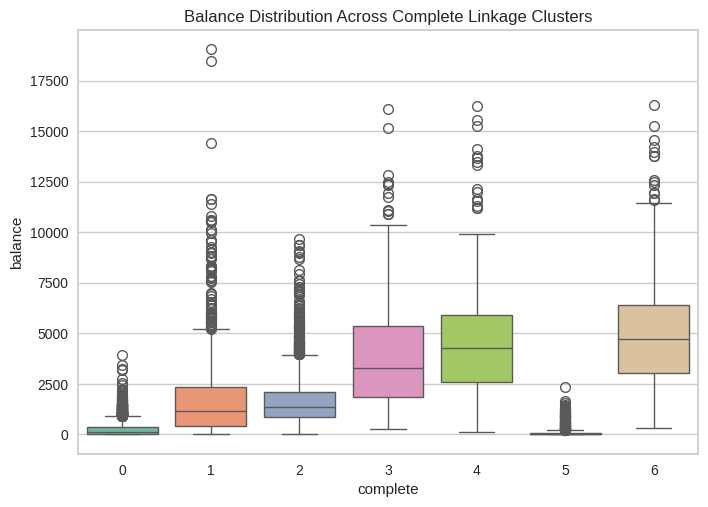

/tmp/ipykernel_27312/1045948661.py:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




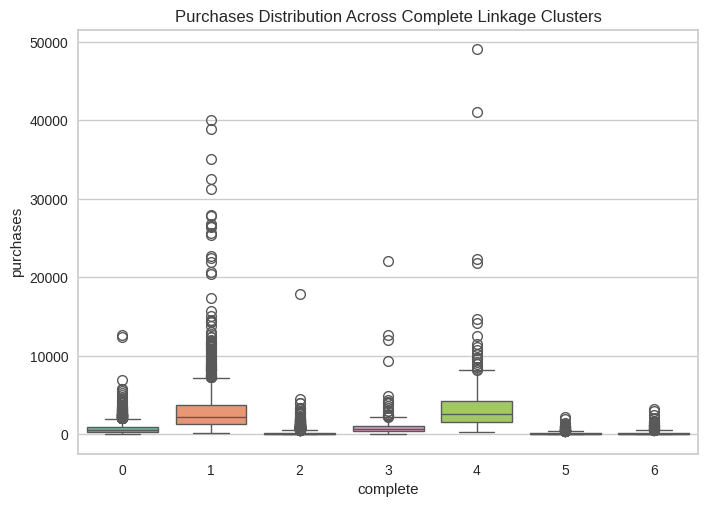

/tmp/ipykernel_27312/1045948661.py:12: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




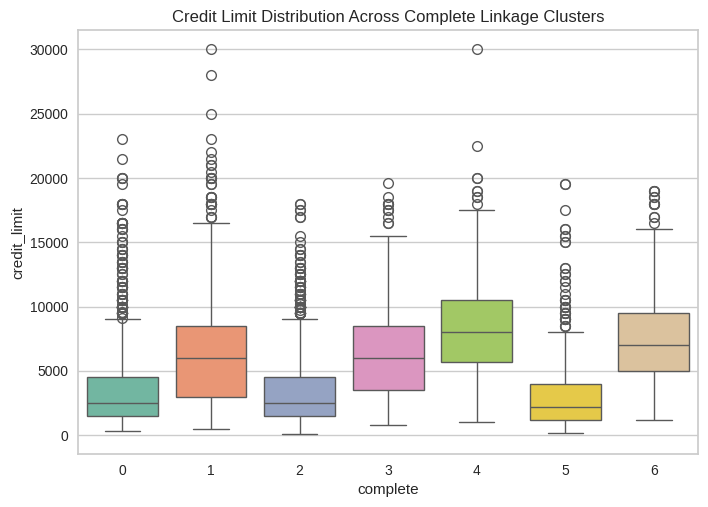

In [76]:
# Visualize balance distribution for Complete clusters
sns.boxplot(x='complete', y='balance', data=df_dend, palette="Set2")
plt.title('Balance Distribution Across Complete Linkage Clusters')
plt.show()

# Visualize purchases distribution for Complete clusters
sns.boxplot(x='complete', y='purchases', data=df_dend, palette="Set2")
plt.title('Purchases Distribution Across Complete Linkage Clusters')
plt.show()

# Visualize credit limit distribution for Complete clusters
sns.boxplot(x='complete', y='credit_limit', data=df_dend, palette="Set2")
plt.title('Credit Limit Distribution Across Complete Linkage Clusters')
plt.show()


3. Behavioral Insights for Complete Linkage Clusters
Now that you have a clear idea of the behaviors within each cluster, you can apply the following insights for targeted marketing and customer relationship management.

High-Balance Customers: Focus on debt management services, premium reward programs, or balance transfer offers to reduce outstanding balances.
Frequent Purchasers: Offer frequent purchase rewards (cashback, points), and personalized product recommendations.
Cash-Advance Users: Provide financial advice or promote products aimed at improving liquidity, such as low-interest loans.
High-Payment Customers: Incentivize larger purchases with flexible payment plans and enhanced credit limits for loyal customers.
Conclusion
Agglomerative clustering using Complete Linkage has given us a clear segmentation of customers based on their spending, purchasing, and payment behaviors. Each cluster shows distinct patterns, which can be leveraged for targeted marketing strategies and personalized offers.

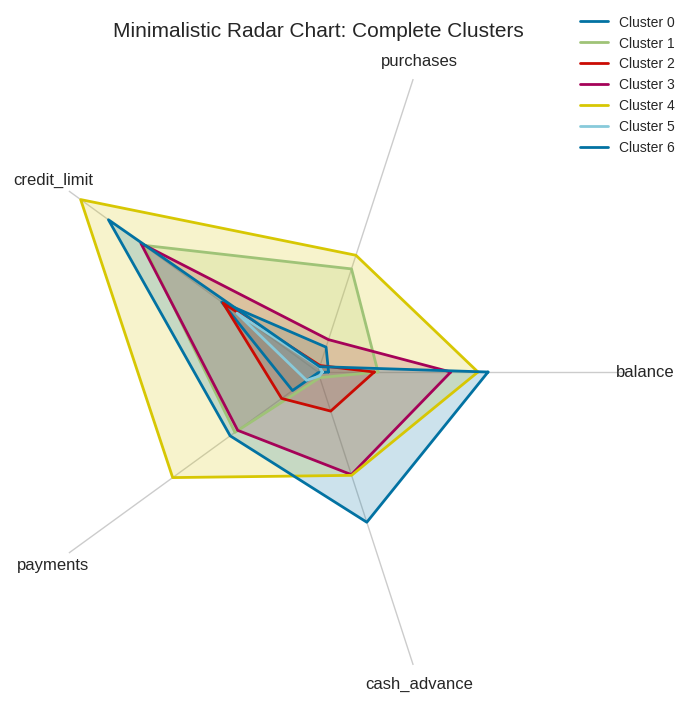

In [77]:
minimalistic_radar(df_dend, 'complete')


In [79]:
# Use the top contributing features from PCA for clearer visualization
important_features = ['purchases', 'payments', 'credit_limit', 'minimum_payments']  # example



/tmp/ipykernel_27312/1720455014.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




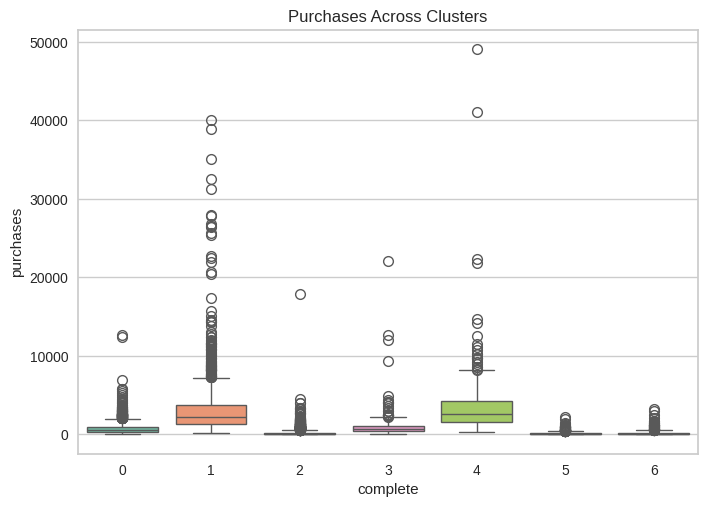

/tmp/ipykernel_27312/1720455014.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




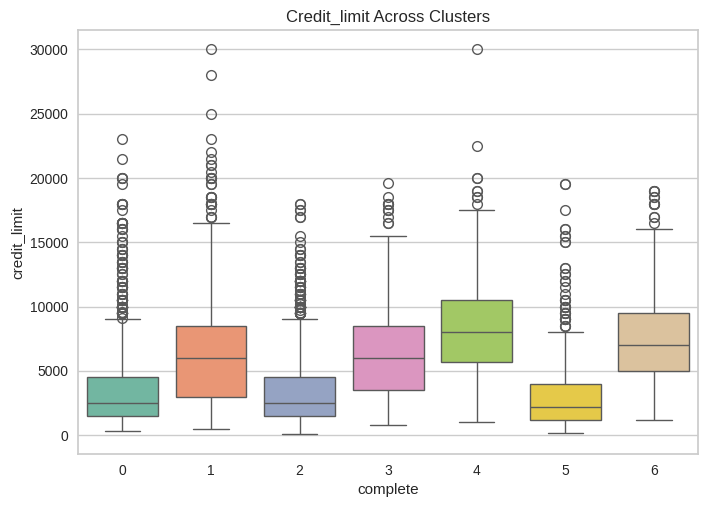

/tmp/ipykernel_27312/1720455014.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




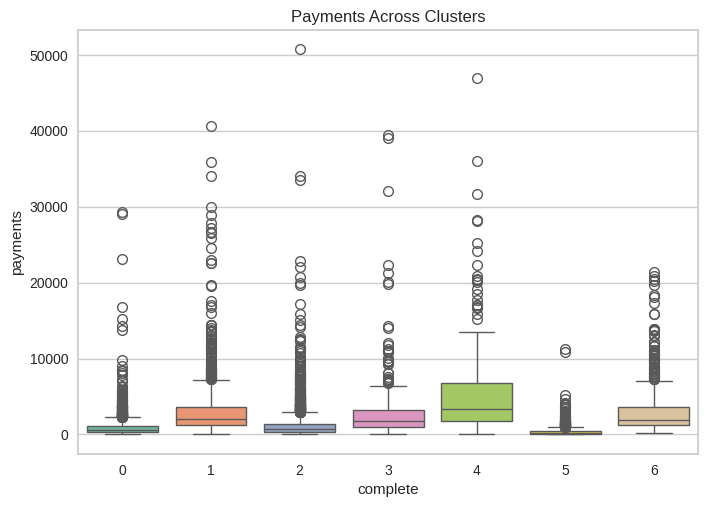

In [81]:
# Visualize the most relevant features for each cluster
cluster_features = ['purchases', 'credit_limit', 'payments']

# Boxplot visualization with key features
for feature in cluster_features:
    sns.boxplot(x='complete', y=feature, data=df_dend, palette="Set2")
    plt.title(f'{feature.capitalize()} Across Clusters')
    plt.show()
